# Predicting House Prices




## 1. Import Libraries

In [226]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SequentialFeatureSelector as SFS
import warnings
warnings.filterwarnings("ignore")

import xgboost as xgb

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


In [227]:
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

## 2. Exploratory Data Analysis

### 2.1. Data Properties

In [228]:
try:
    df = pd.read_csv('/content/sample_data/train.csv')
except:
    print("Error")

try:
    df = pd.read_csv('train.csv')
except:
    print("Error")

Error


In [229]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [230]:
df.shape

(1460, 81)

In [231]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [232]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [234]:
df.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [235]:
original = df

### 2.2. Data Cleaning

<Axes: ylabel='None'>

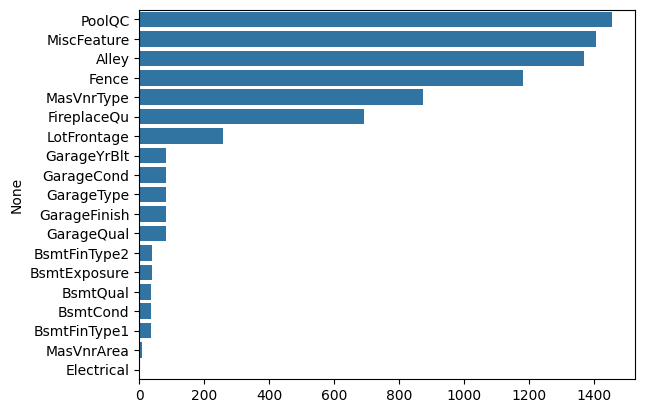

In [236]:

missing_values_count = df.isna().sum().sort_values(ascending=False)
missing_values_count_filtered = missing_values_count[missing_values_count > 0]

sns.barplot(x=missing_values_count_filtered.values, y=missing_values_count_filtered.index)

In [237]:
df = df.drop('Id', axis = 1)
df = df.drop('GarageYrBlt', axis = 1)

In [238]:

df.dropna(subset=['Electrical'], inplace=True)

cols_to_NA = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']

for col in cols_to_NA:
    df[col] = df[col].fillna('NA')

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [239]:
print(df.isna().sum().sort_values(ascending=False))

MSSubClass       0
BedroomAbvGr     0
GarageType       0
FireplaceQu      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
HalfBath         0
GarageCars       0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
GarageFinish     0
GarageArea       0
CentralAir       0
PoolQC           0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
MiscFeature      0
Fence            0
PoolArea         0
GarageQual       0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
Electrical       0
HeatingQC        0
MSZoning         0
LandSlope        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LotConfig        0
YearRemodAdd     0
Utilities        0
LandContour 

<Axes: xlabel='SalePrice', ylabel='Density'>

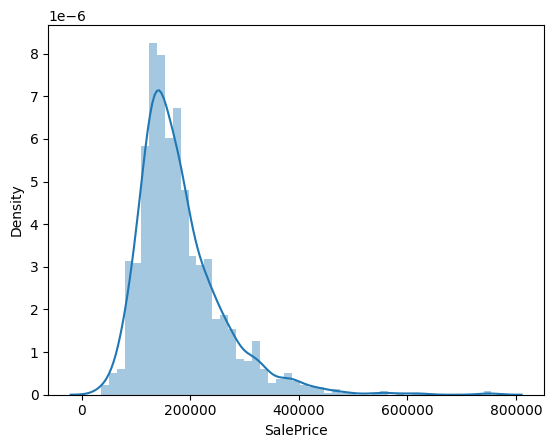

In [240]:
sns.distplot(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

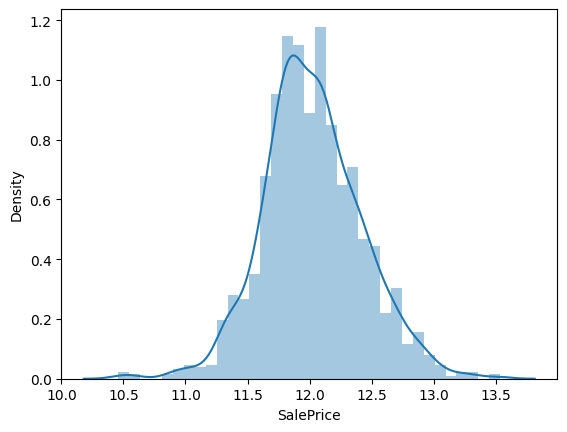

In [241]:
sns.distplot(np.log(df['SalePrice']))

In [242]:
df['SalePrice'] = np.log(df['SalePrice'])

### 2.3. Feature Engineering

In [243]:
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
df["Age"] = pd.to_numeric(df["YrSold"]) - pd.to_numeric(df["YearBuilt"])
df['Total_Home_Quality'] = df['OverallQual'] + df['OverallCond']

In [244]:
df.describe().T

count          mean          std          min  \
MSSubClass          1459.0     56.881426    42.310746    20.000000   
LotFrontage         1459.0     70.047500    22.031439    21.000000   
LotArea             1459.0  10517.363948  9984.666267  1300.000000   
OverallQual         1459.0      6.100069     1.383171     1.000000   
OverallCond         1459.0      5.575737     1.113079     1.000000   
YearBuilt           1459.0   1971.244003    30.199555  1872.000000   
YearRemodAdd        1459.0   1984.850583    20.644343  1950.000000   
MasVnrArea          1459.0    103.187800   180.773158     0.000000   
BsmtFinSF1          1459.0    443.943797   456.106417     0.000000   
BsmtFinSF2          1459.0     46.581220   161.369977     0.000000   
BsmtUnfSF           1459.0    567.366004   441.992392     0.000000   
TotalBsmtSF         1459.0   1057.891021   438.500975     0.000000   
1stFlrSF            1459.0   1162.906785   386.572089   334.000000   
2ndFlrSF            1459.0    346.791638   436.610637     0.000000   
LowQualFinSF        1459.0      5.848526    48.639512     0.000000   
GrLivArea           1459.0   1515.546950   525.650927   334.000000   
BsmtFullBath        1459.0      0.425634     0.518969     0.000000   
BsmtHalfBath        1459.0      0.057574     0.238830     0.000000   
FullBath            1459.0      1.564770     0.550987     0.000000   
HalfBath            1459.0      0.382454     0.502798     0.000000   
BedroomAbvGr        1459.0      2.866347     0.816050     0.000000   
KitchenAbvGr        1459.0      1.046607     0.220410     0.000000   
TotRmsAbvGrd        1459.0      6.517478     1.625902     2.000000   
Fireplaces          1459.0      0.613434     0.644687     0.000000   
GarageCars          1459.0      1.766964     0.747546     0.000000   
GarageArea          1459.0    473.030158   213.869604     0.000000   
WoodDeckSF          1459.0     94.240576   125.381679     0.000000   
OpenPorchSF         1459.0     46.692255    66.267472     0.000000   
EnclosedPorch       1459.0     21.969157    61.137400     0.000000   
3SsnPorch           1459.0      3.411926    29.327247     0.000000   
ScreenPorch         1459.0     15.071282    55.775138     0.000000   
PoolArea            1459.0      2.760795    40.191018     0.000000   
MiscVal             1459.0     43.518849   496.291826     0.000000   
MoSold              1459.0      6.322824     2.704331     1.000000   
YrSold              1459.0   2007.815627     1.328542  2006.000000   
SalePrice           1459.0     12.024048     0.399589    10.460242   
Total_Bathrooms     1459.0      2.210418     0.785631     1.000000   
Age                 1459.0     36.571624    30.246986     0.000000   
Total_Home_Quality  1459.0     11.675805     1.693540     2.000000   

                            25%          50%           75%            max  
MSSubClass            20.000000    50.000000     70.000000     190.000000  
LotFrontage           60.000000    70.047500     79.000000     313.000000  
LotArea             7549.000000  9477.000000  11603.000000  215245.000000  
OverallQual            5.000000     6.000000      7.000000      10.000000  
OverallCond            5.000000     5.000000      6.000000       9.000000  
YearBuilt           1954.000000  1973.000000   2000.000000    2010.000000  
YearRemodAdd        1967.000000  1994.000000   2004.000000    2010.000000  
MasVnrArea             0.000000     0.000000    164.500000    1600.000000  
BsmtFinSF1             0.000000   384.000000    712.500000    5644.000000  
BsmtFinSF2             0.000000     0.000000      0.000000    1474.000000  
BsmtUnfSF            223.000000   479.000000    808.000000    2336.000000  
TotalBsmtSF          796.000000   992.000000   1298.500000    6110.000000  
1stFlrSF             882.000000  1088.000000   1391.500000    4692.000000  
2ndFlrSF               0.000000     0.000000    728.000000    2065.000000  
LowQualFinSF           0.000000     0.000000      0.000000     572.000000  
GrLi

### 2.4. Feature Exploring

In [245]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

<Axes: >

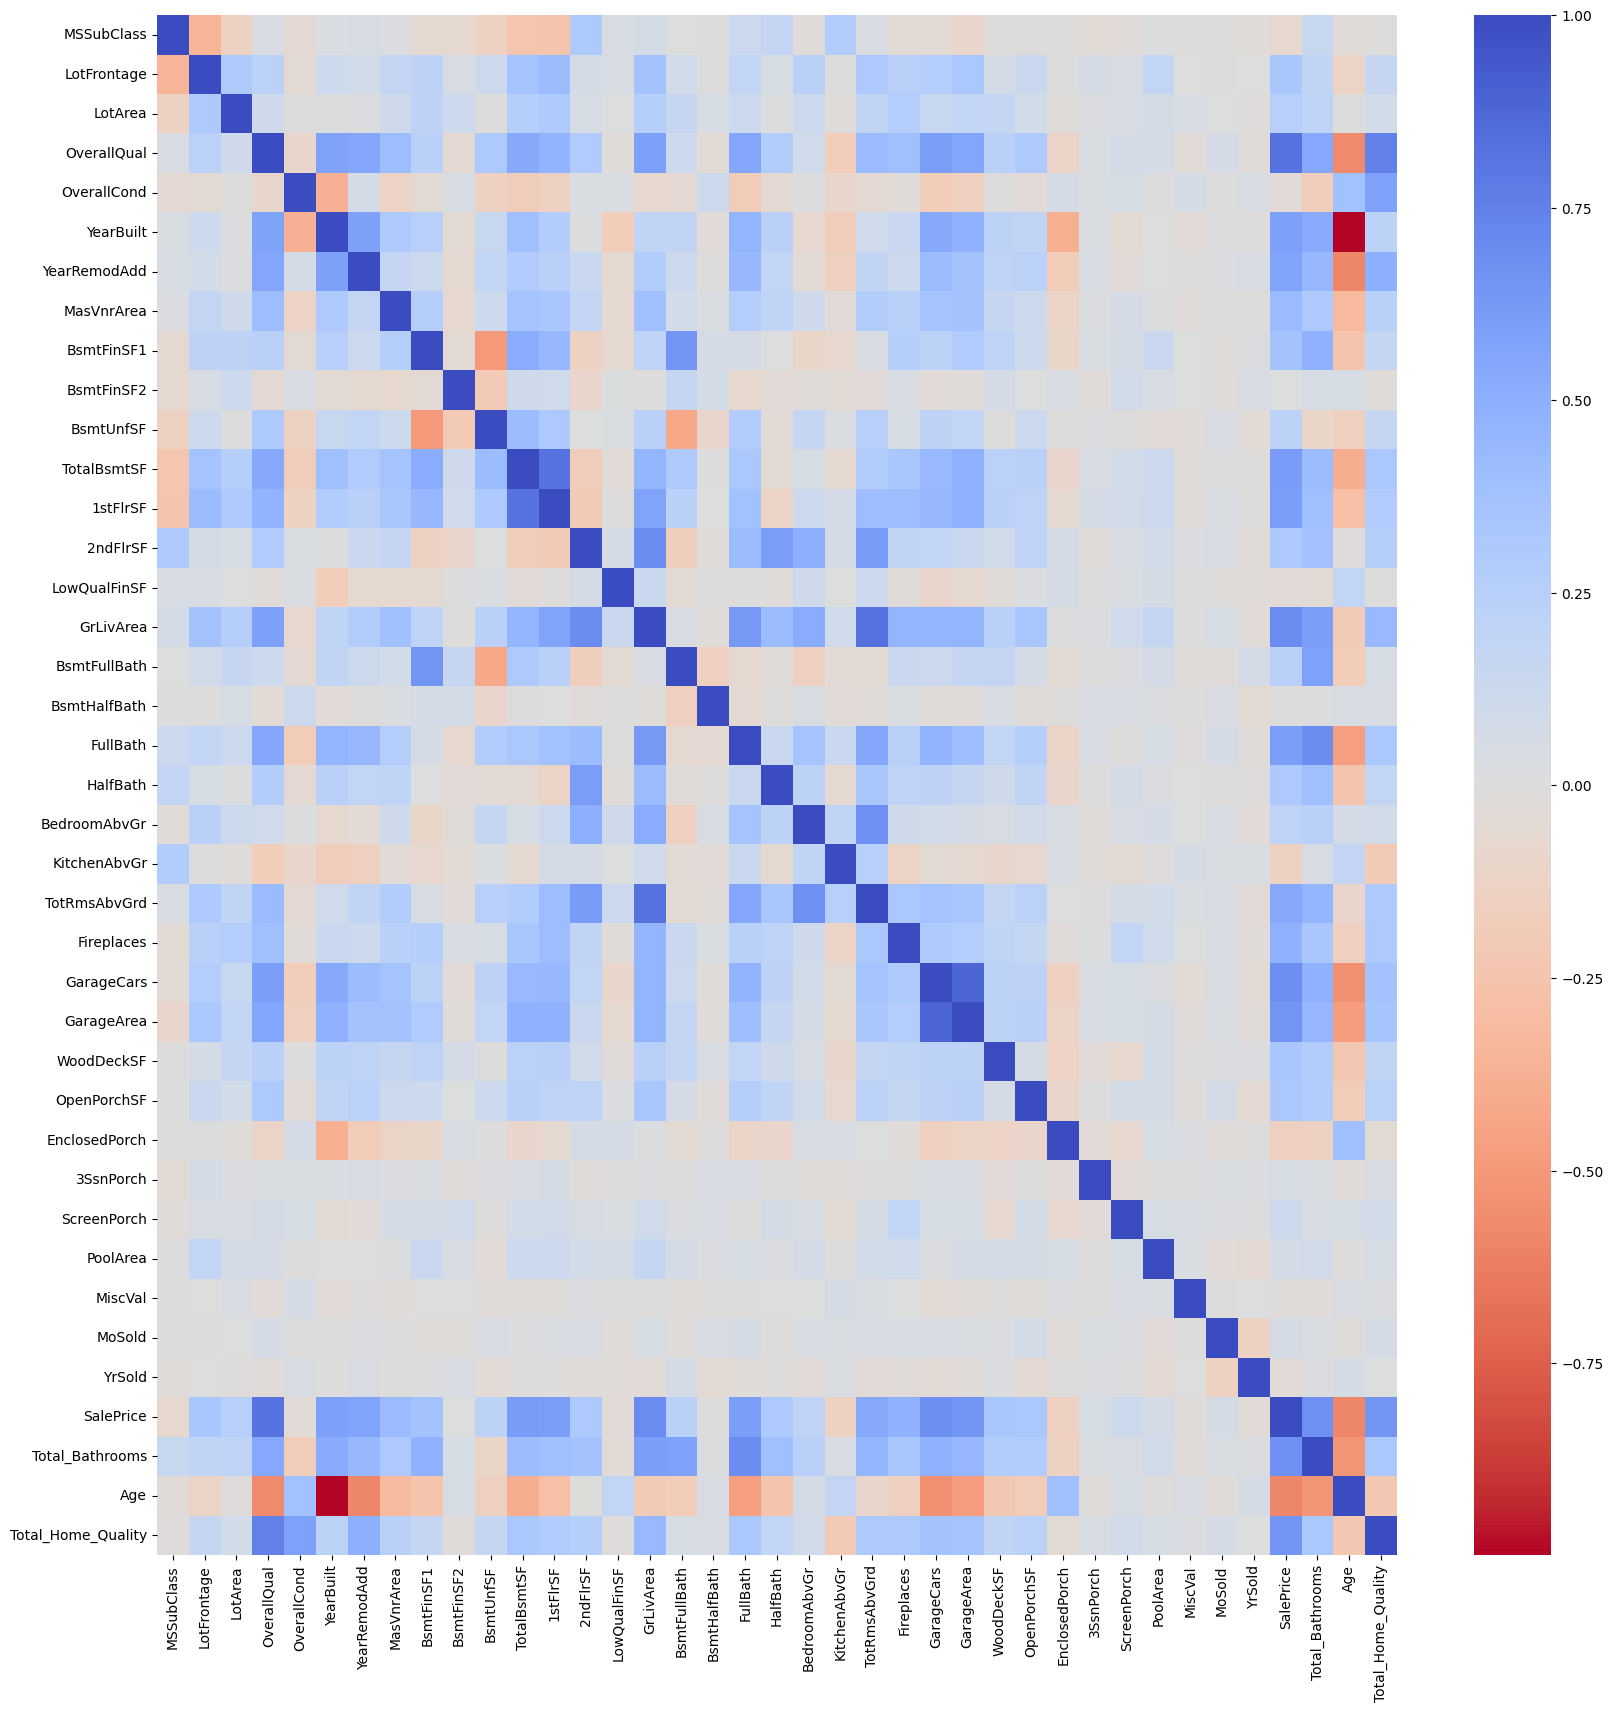

In [246]:
corr = numerical_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='coolwarm_r')

In [247]:
corr['SalePrice'].sort_values()

Age                  -0.587544
EnclosedPorch        -0.149054
KitchenAbvGr         -0.147549
MSSubClass           -0.073971
LowQualFinSF         -0.037962
YrSold               -0.037264
OverallCond          -0.036867
MiscVal              -0.020020
BsmtHalfBath         -0.005147
BsmtFinSF2            0.004835
3SsnPorch             0.054901
MoSold                0.057338
PoolArea              0.069798
ScreenPorch           0.121213
BedroomAbvGr          0.209044
BsmtUnfSF             0.222001
BsmtFullBath          0.236285
LotArea               0.257321
HalfBath              0.314135
2ndFlrSF              0.319344
OpenPorchSF           0.321113
WoodDeckSF            0.334135
LotFrontage           0.336155
BsmtFinSF1            0.372152
MasVnrArea            0.426827
Fireplaces            0.489609
TotRmsAbvGrd          0.534436
YearRemodAdd          0.565822
YearBuilt             0.586827
FullBath              0.594891
1stFlrSF              0.597218
TotalBsmtSF           0.612642
Total_Ho

In [248]:
threshhold = 0.5
numerical_col_to_keep = corr.index[np.where(np.abs(corr['SalePrice']) > threshhold)].tolist()
print(sorted(numerical_col_to_keep))

['1stFlrSF', 'Age', 'FullBath', 'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'SalePrice', 'TotRmsAbvGrd', 'TotalBsmtSF', 'Total_Bathrooms', 'Total_Home_Quality', 'YearBuilt', 'YearRemodAdd']


In [249]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df2 = df.select_dtypes(include=['object'])


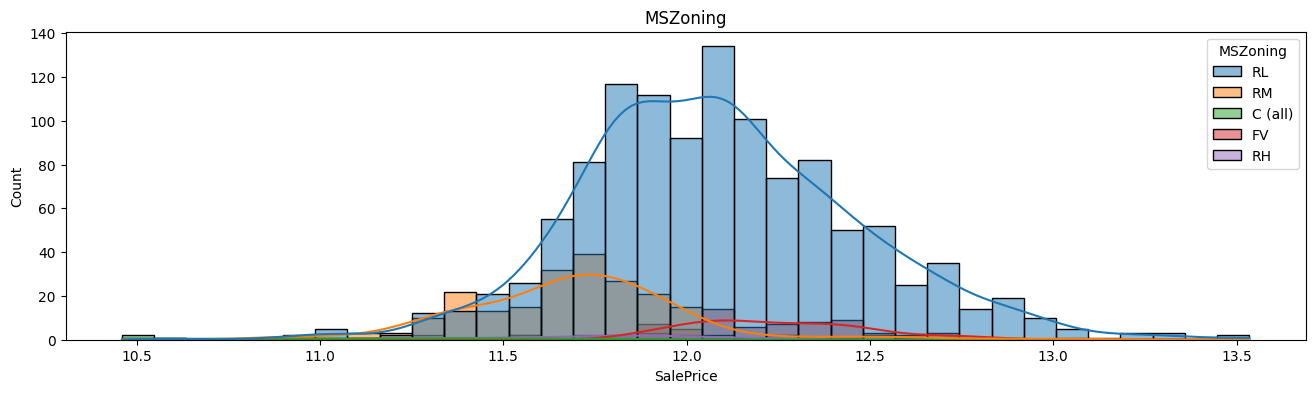

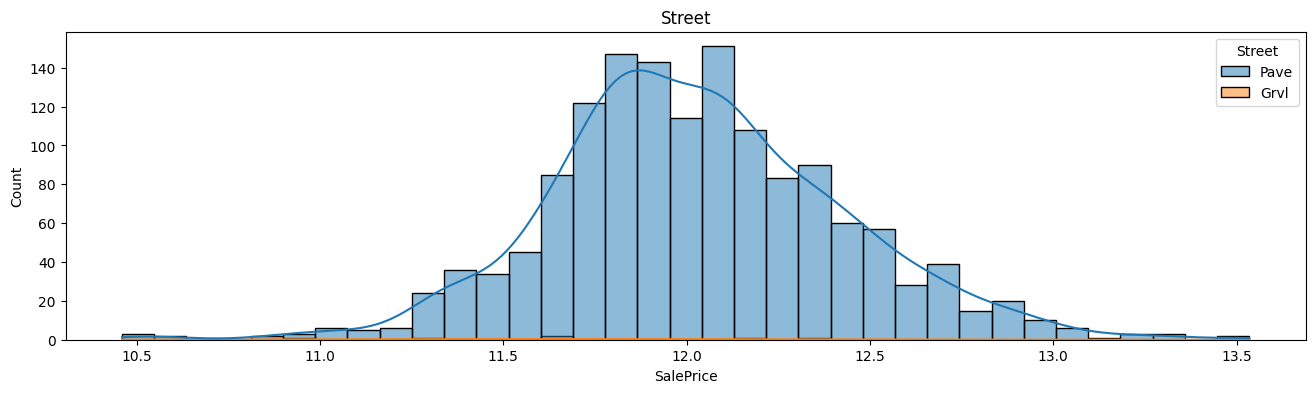

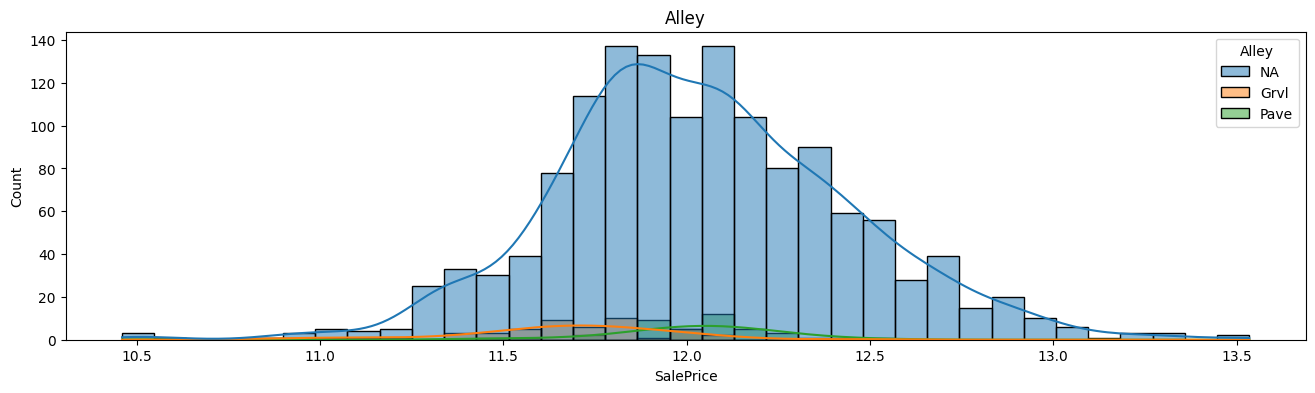

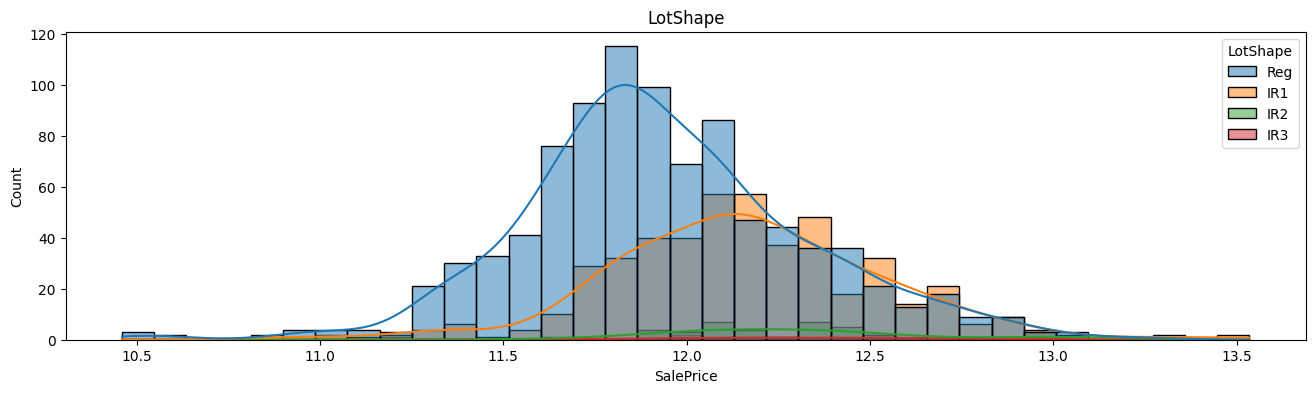

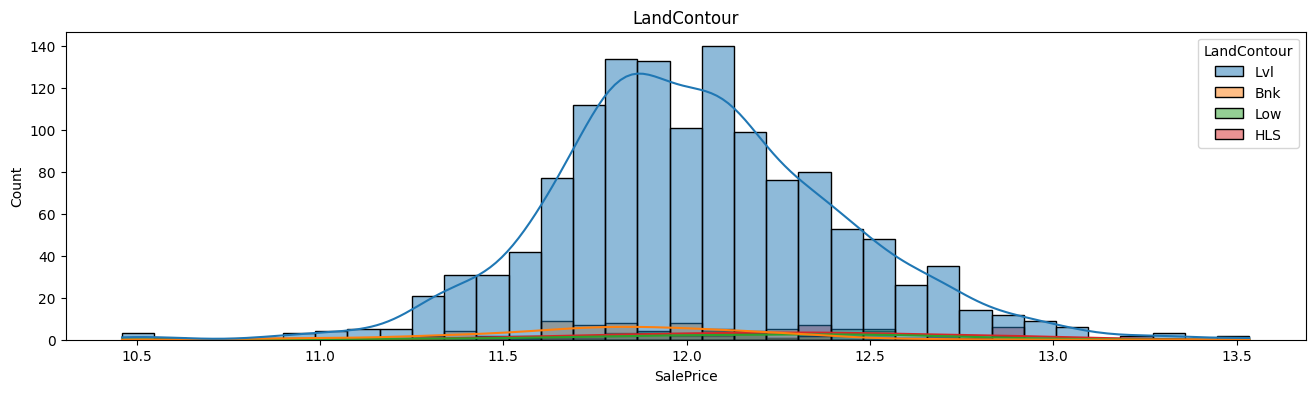

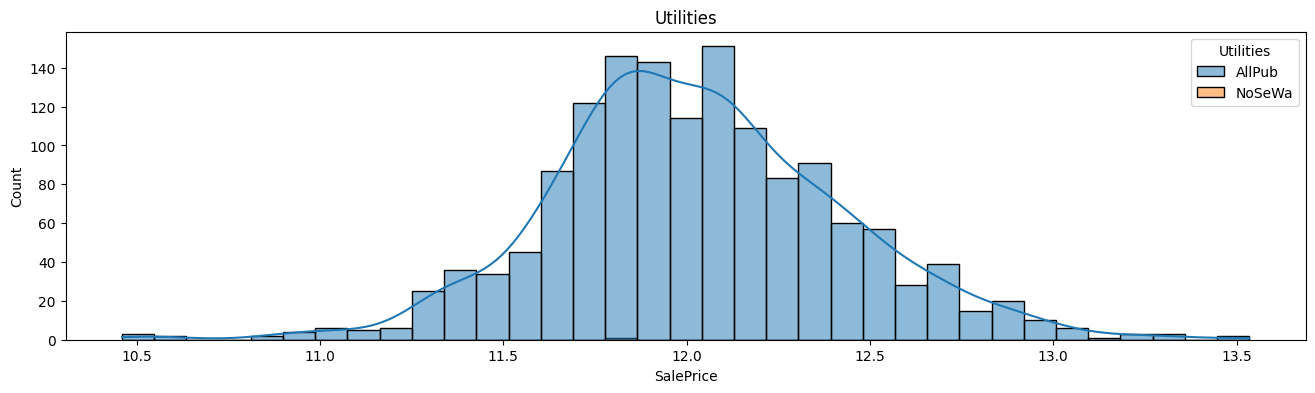

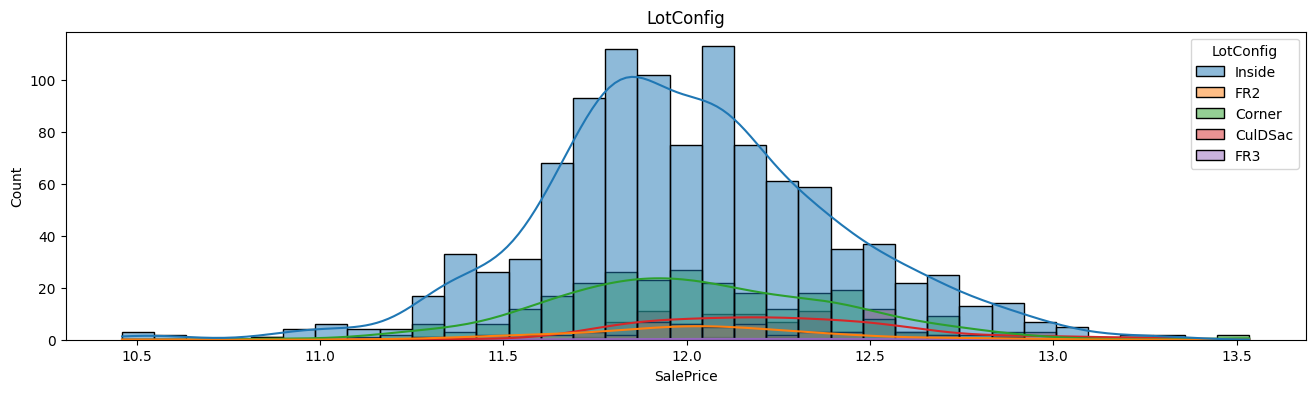

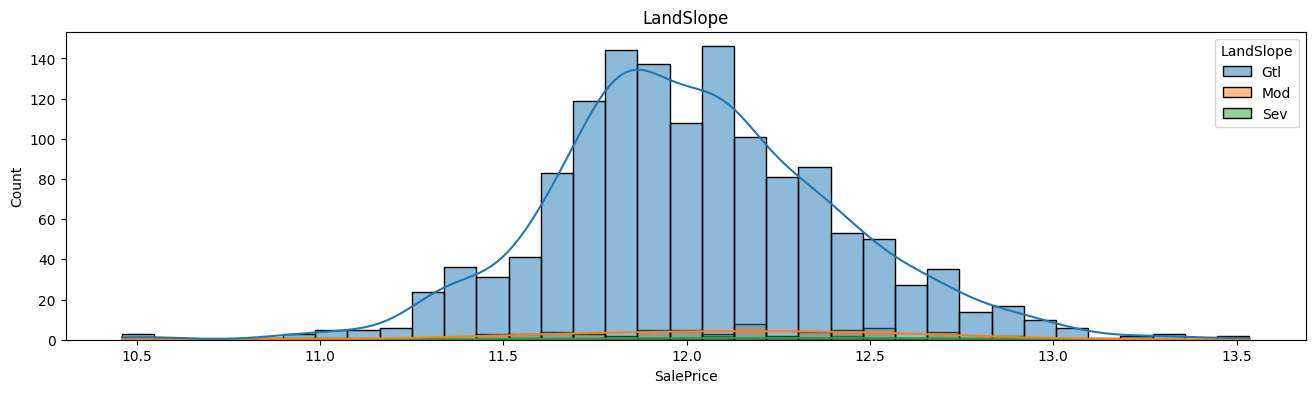

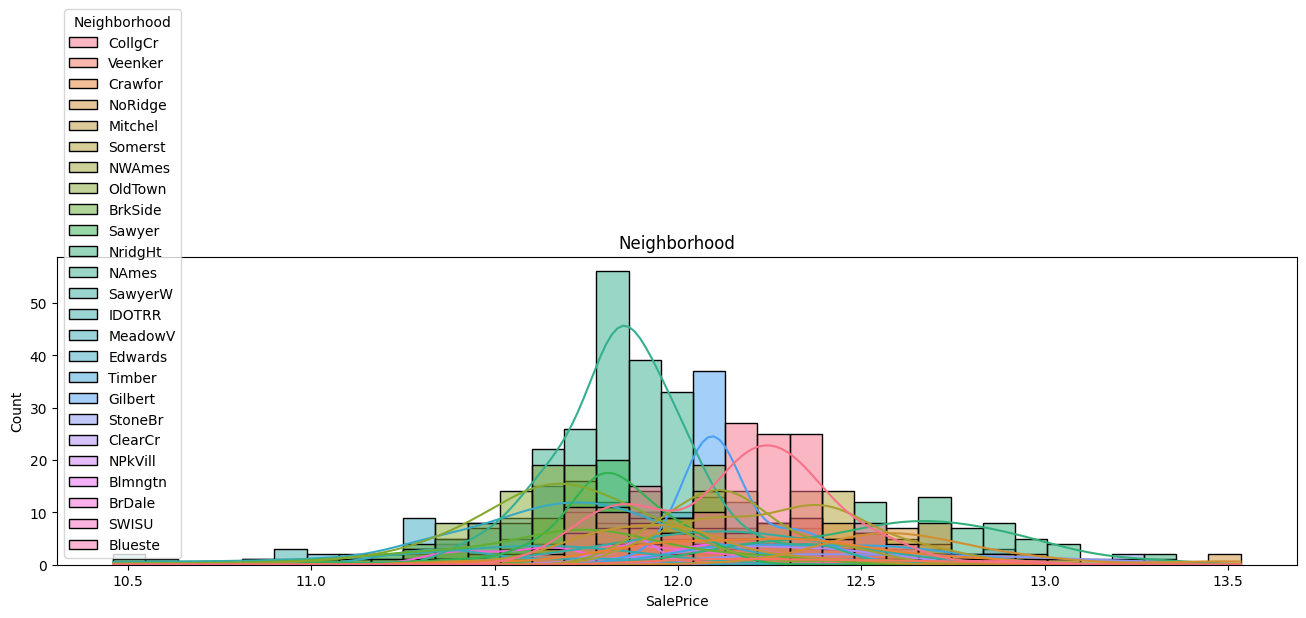

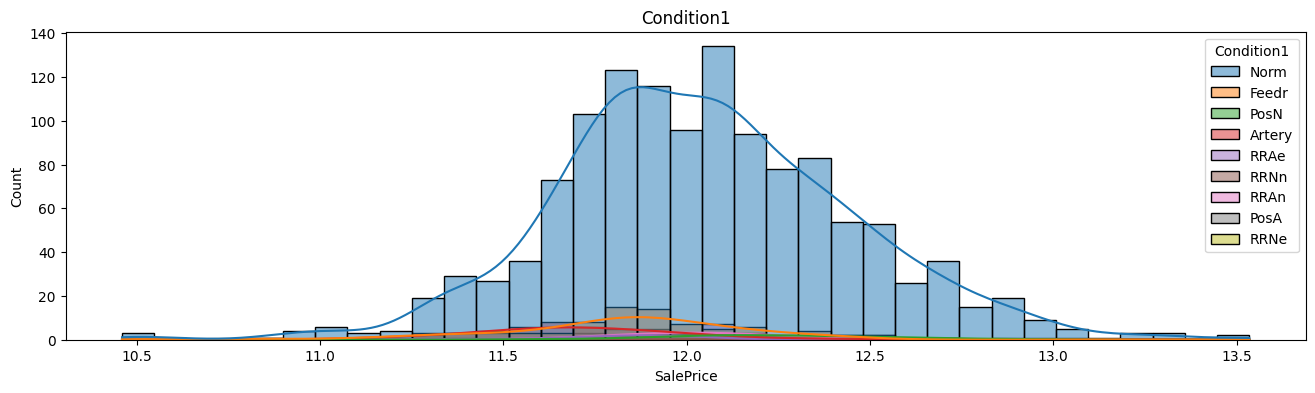

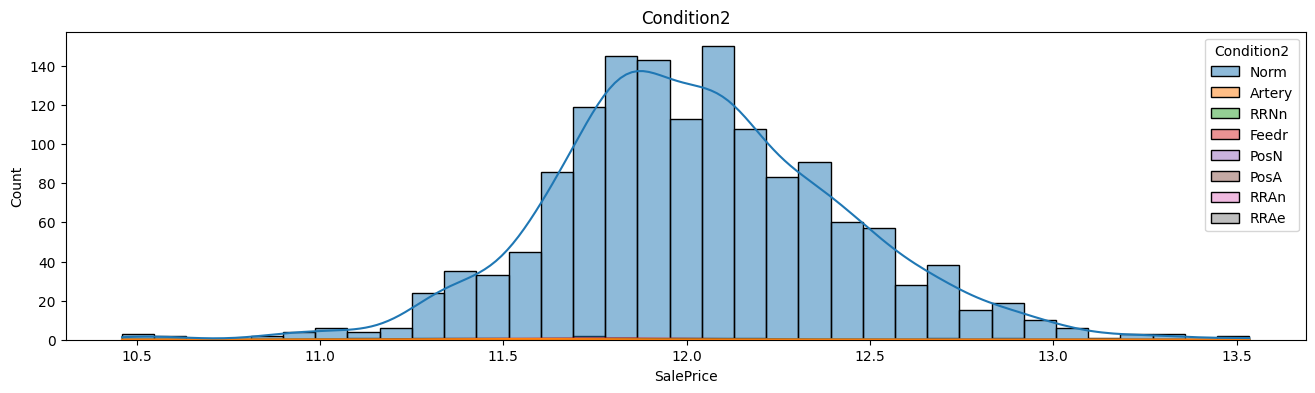

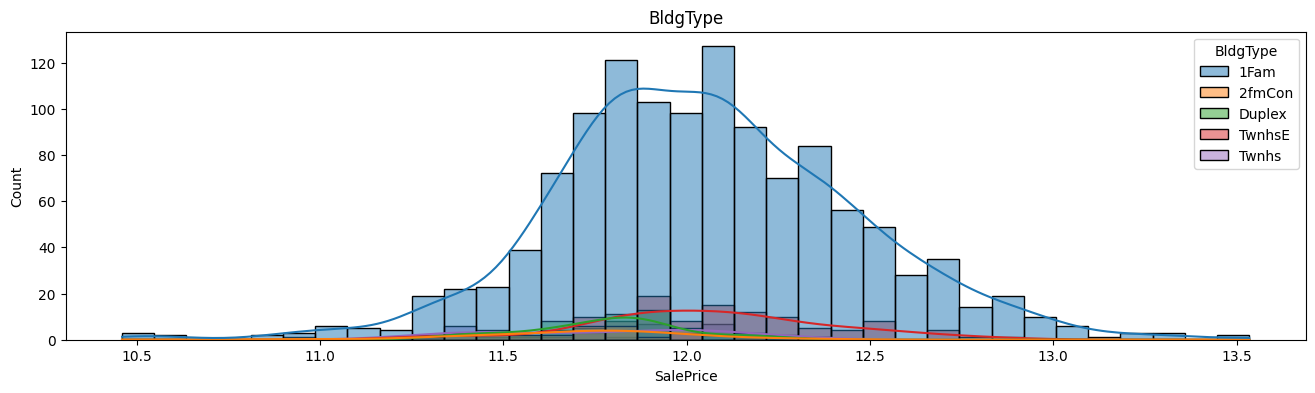

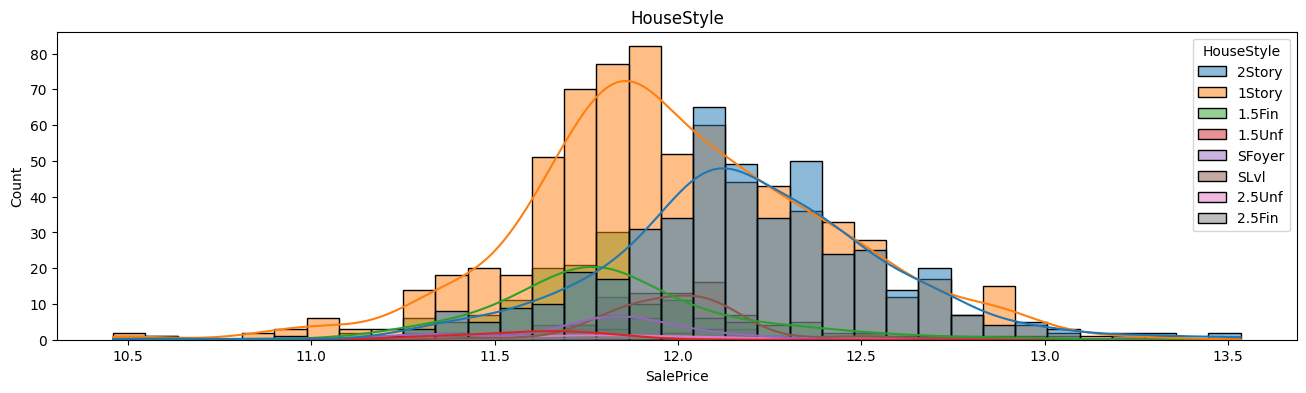

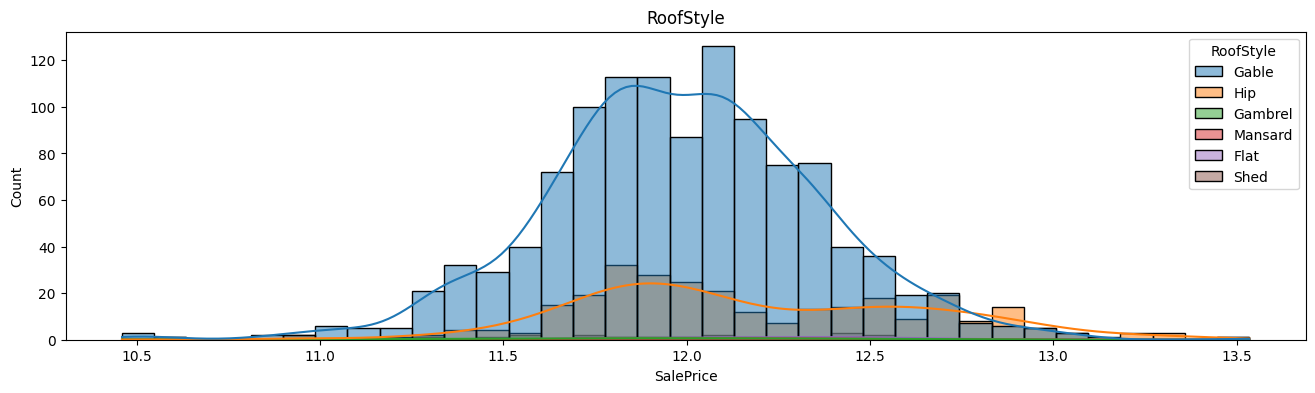

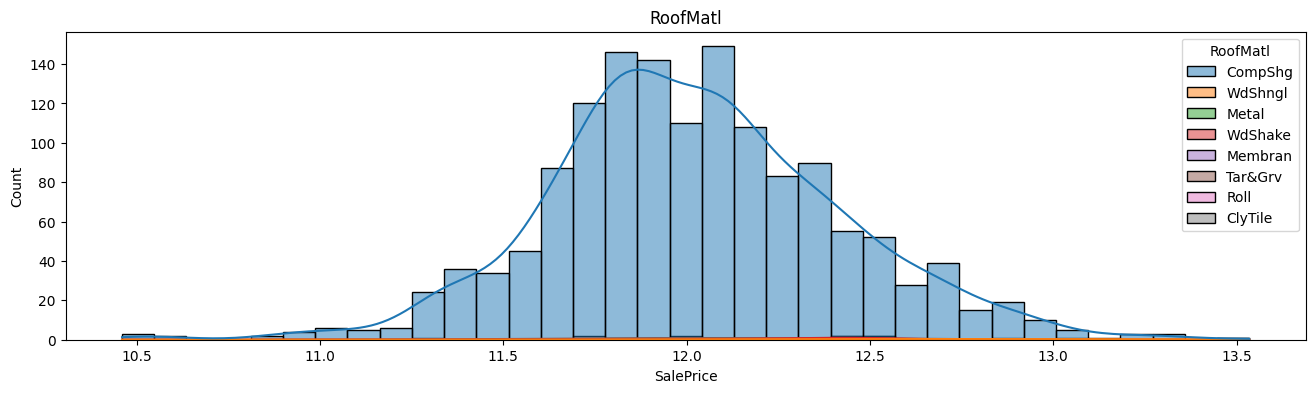

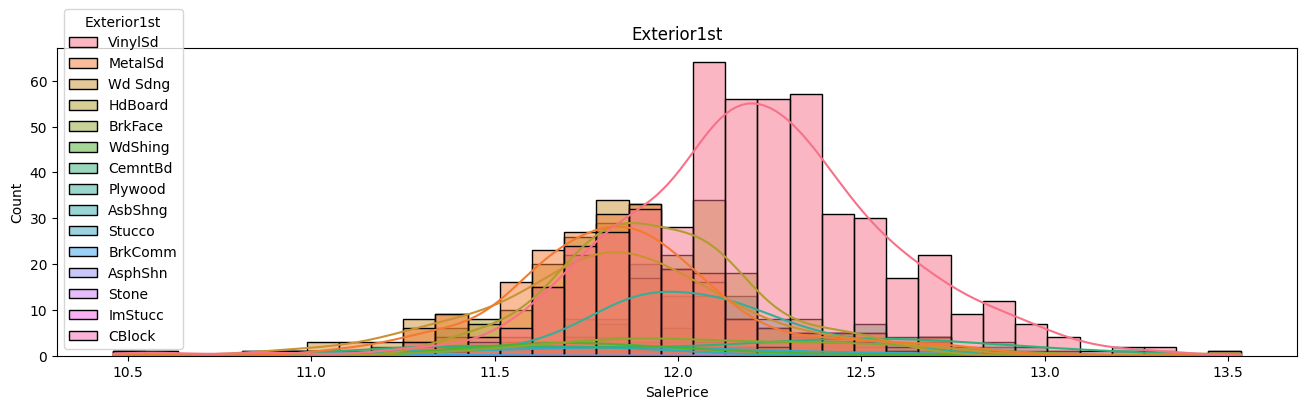

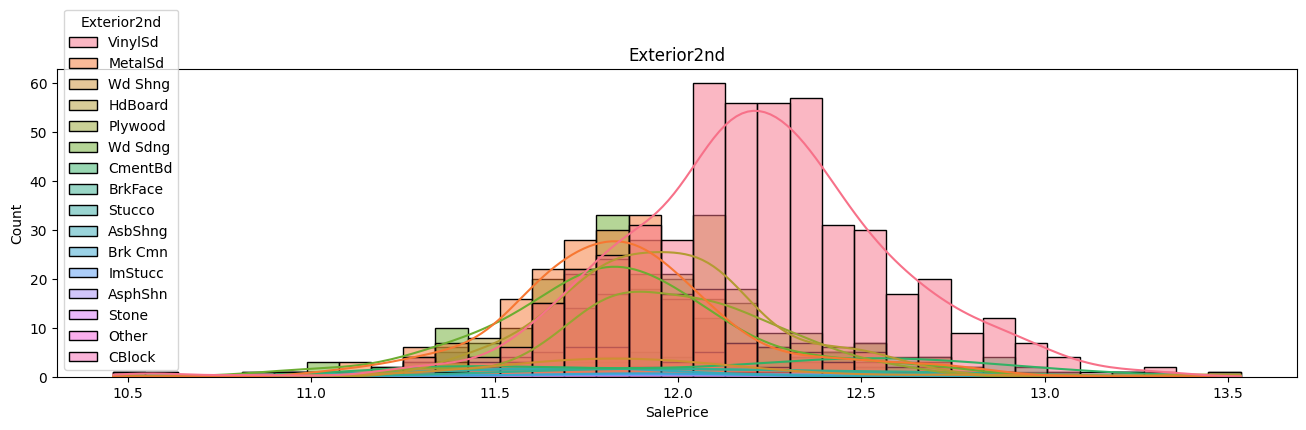

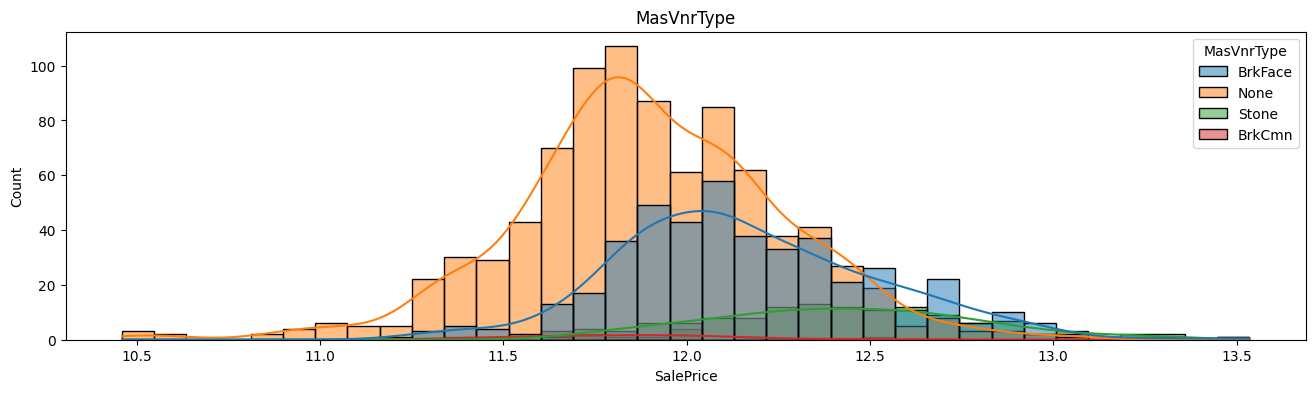

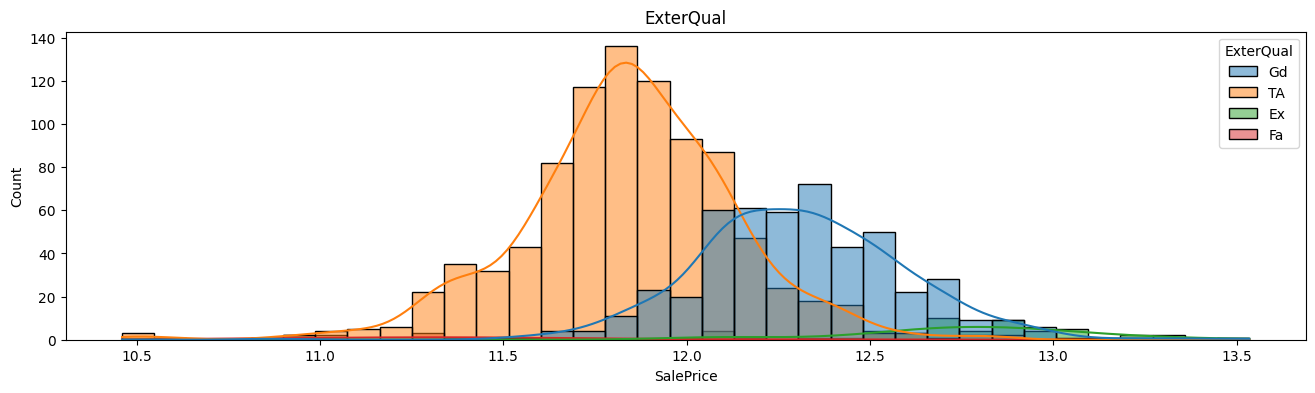

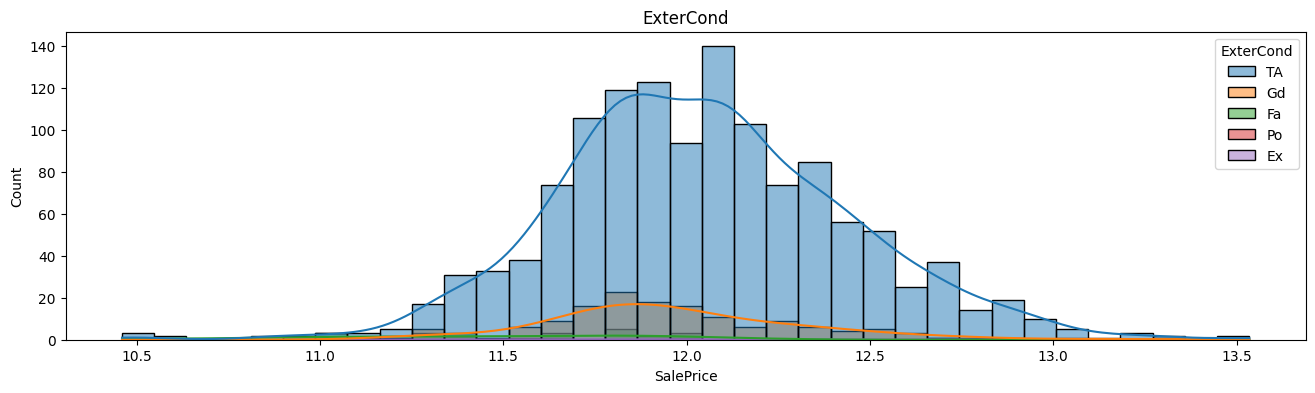

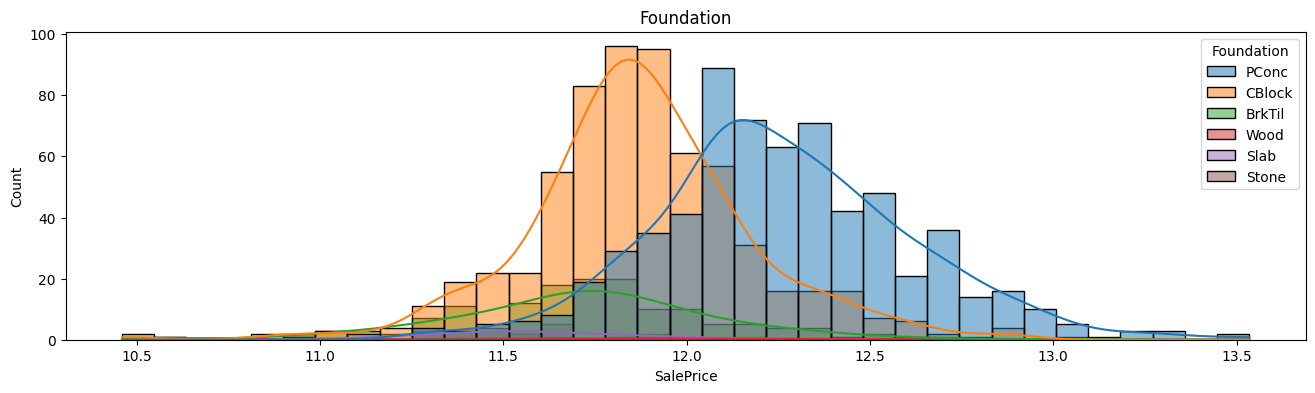

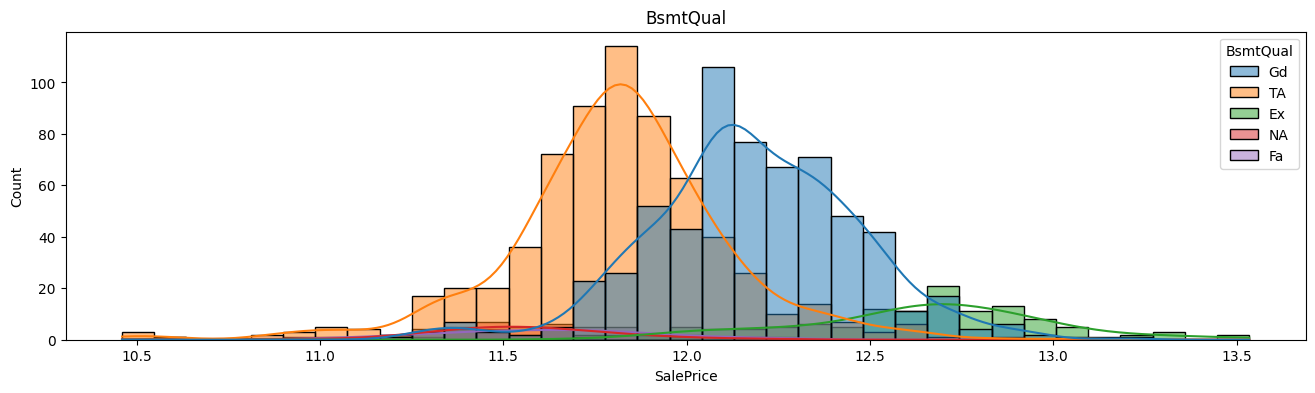

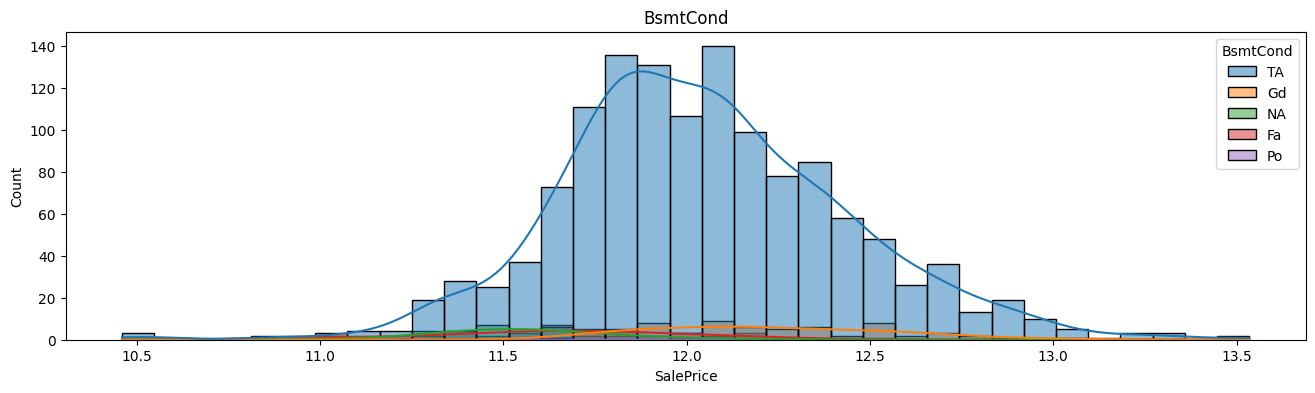

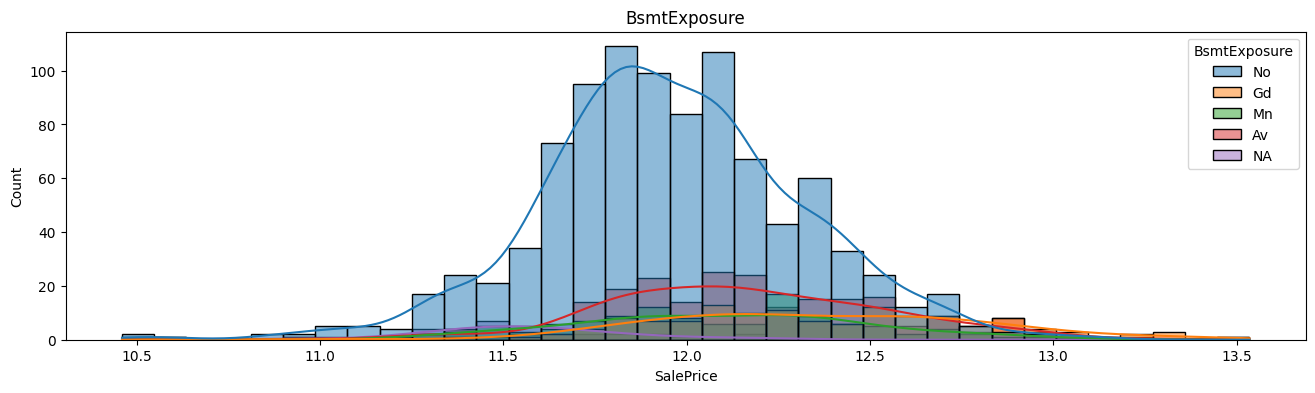

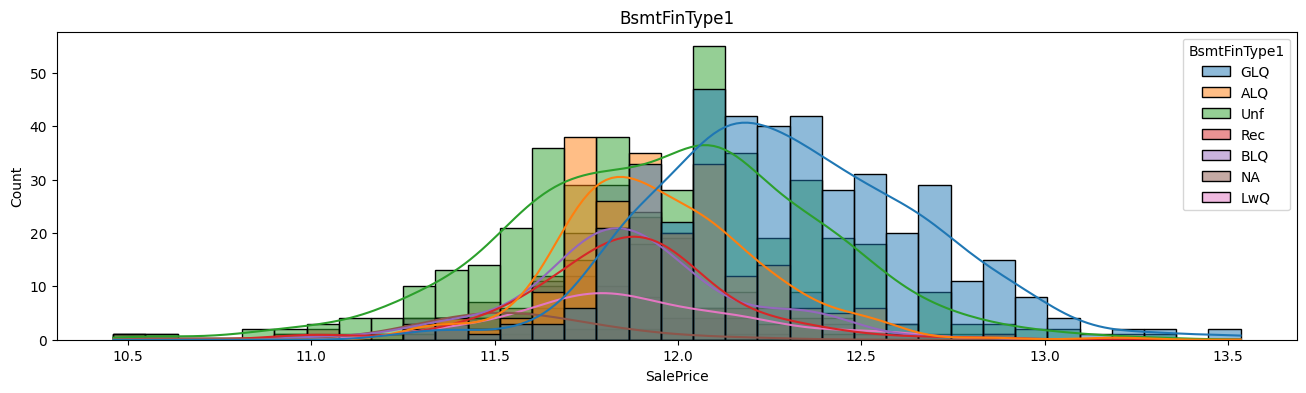

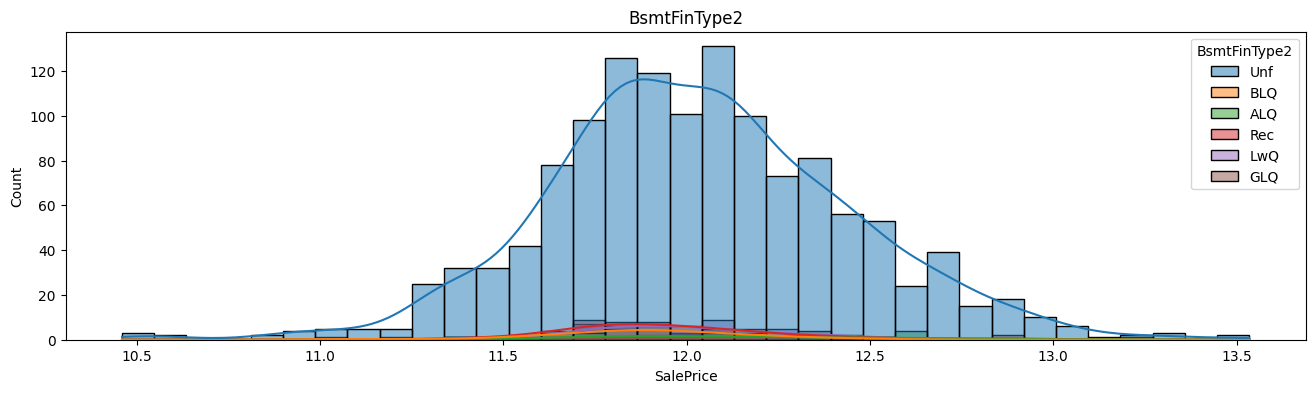

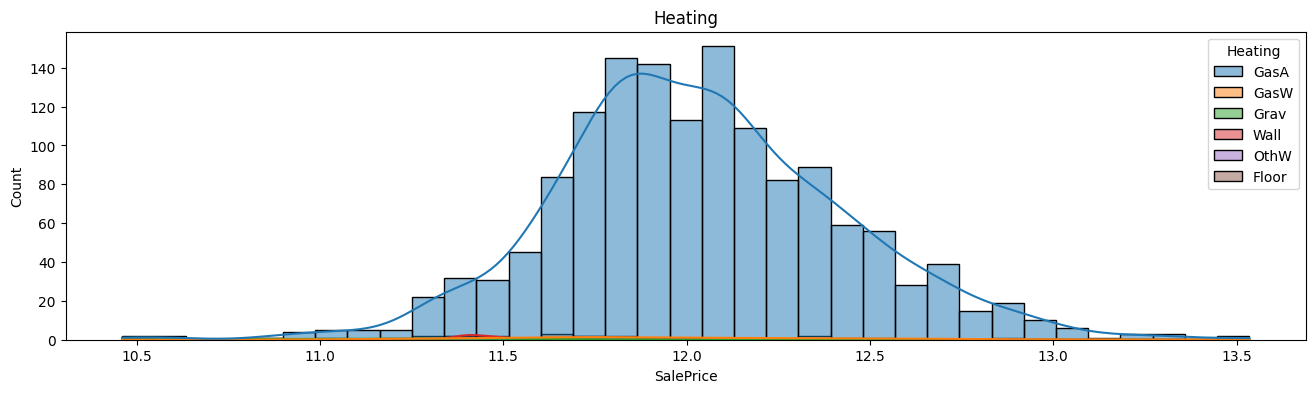

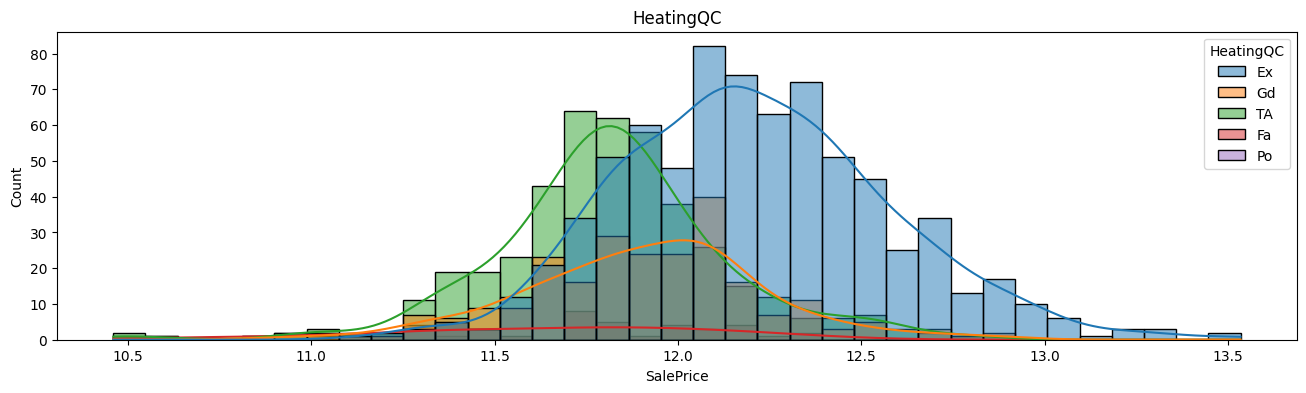

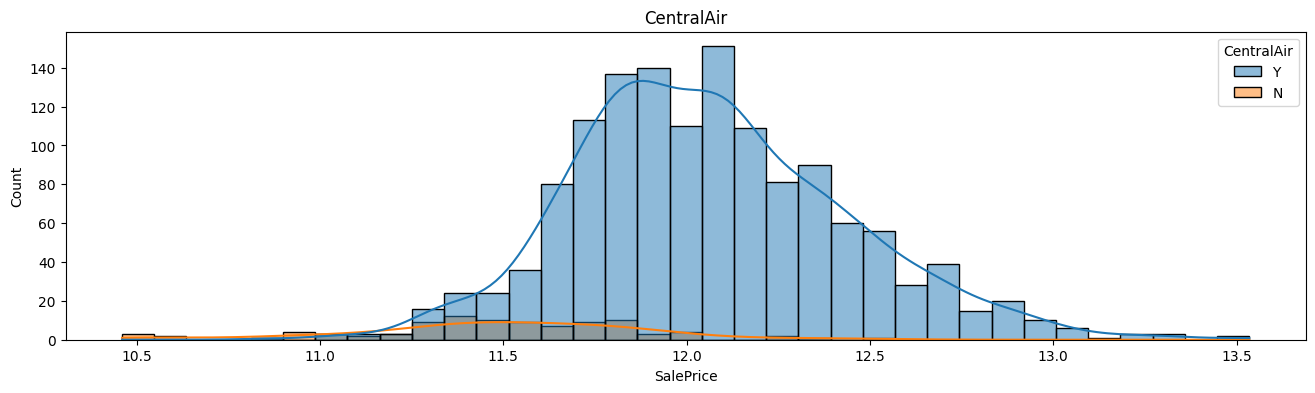

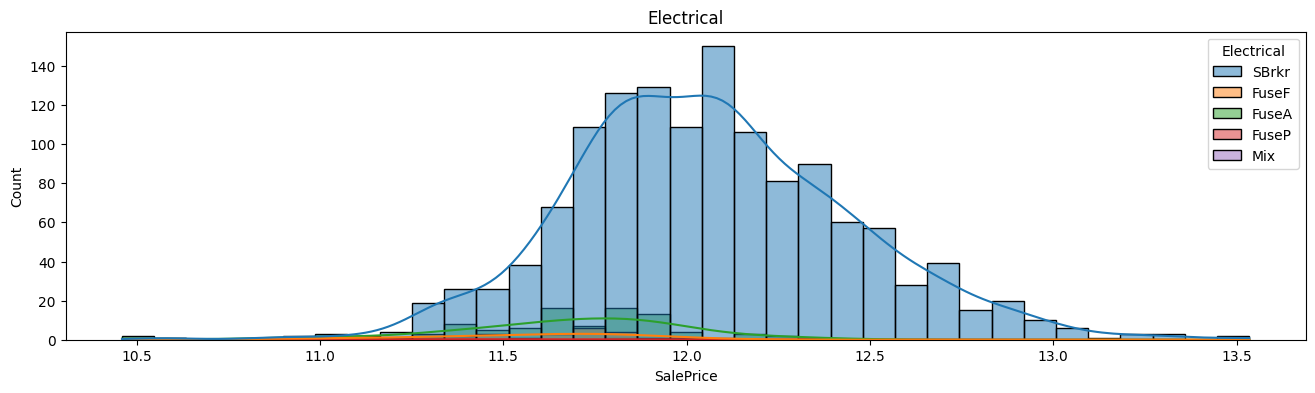

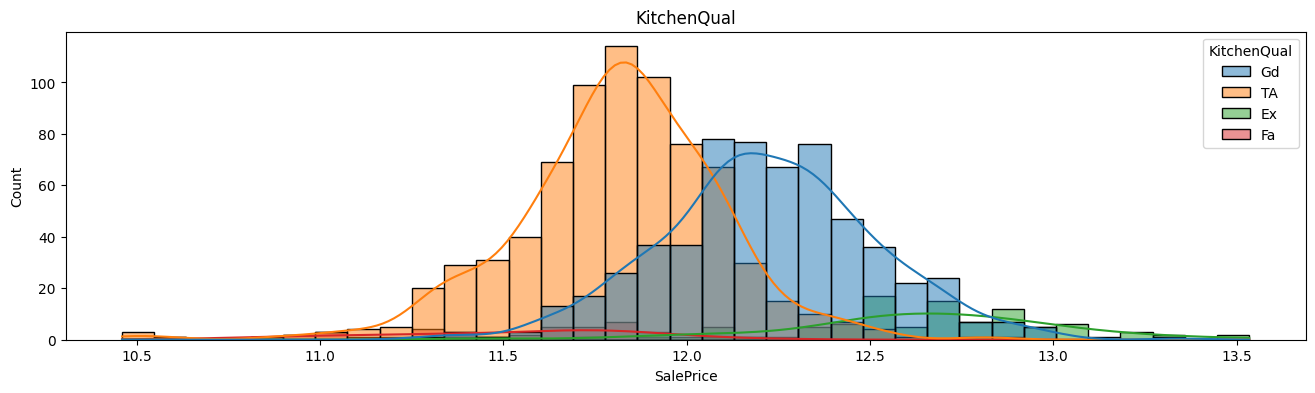

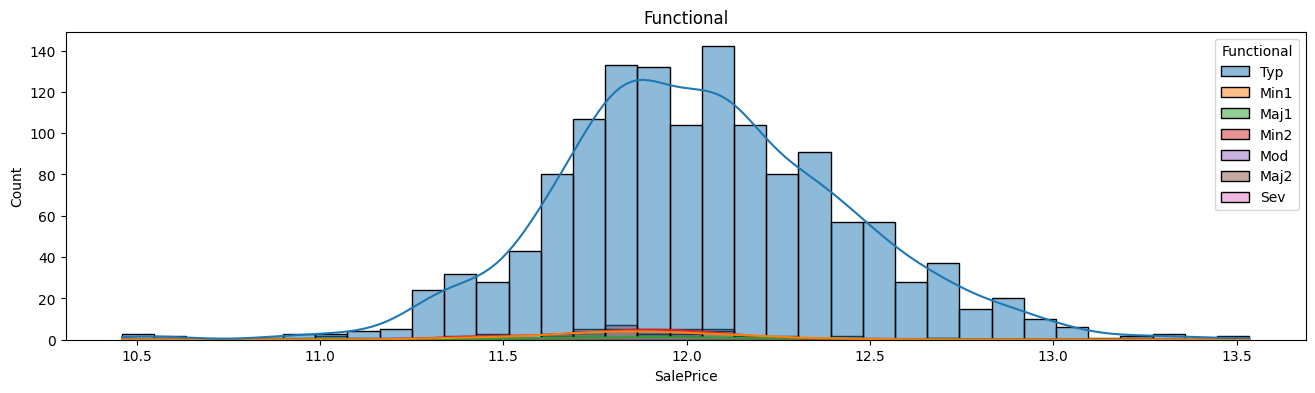

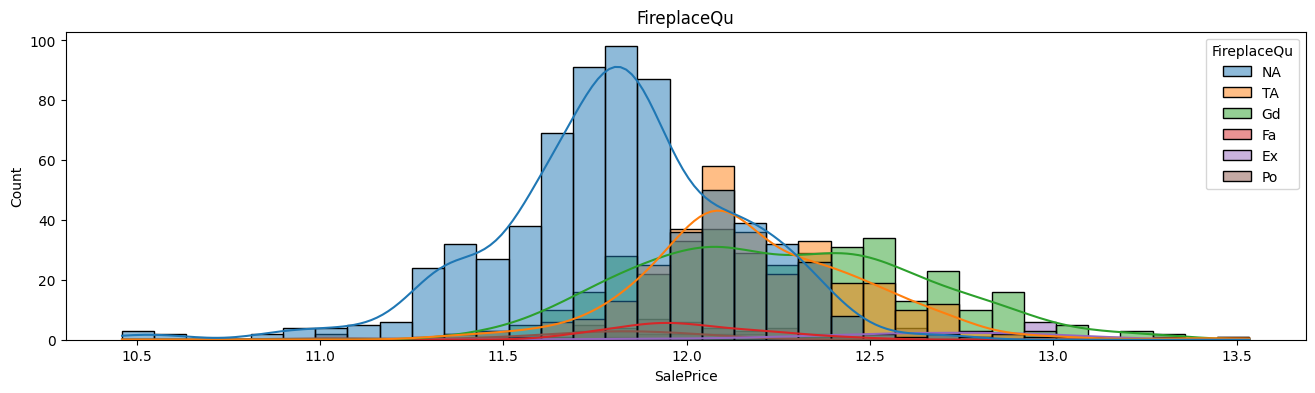

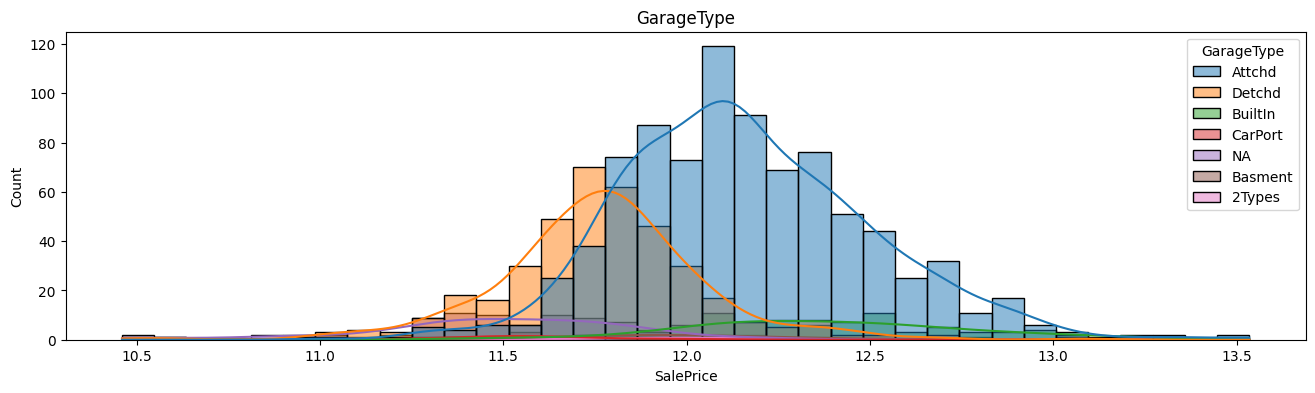

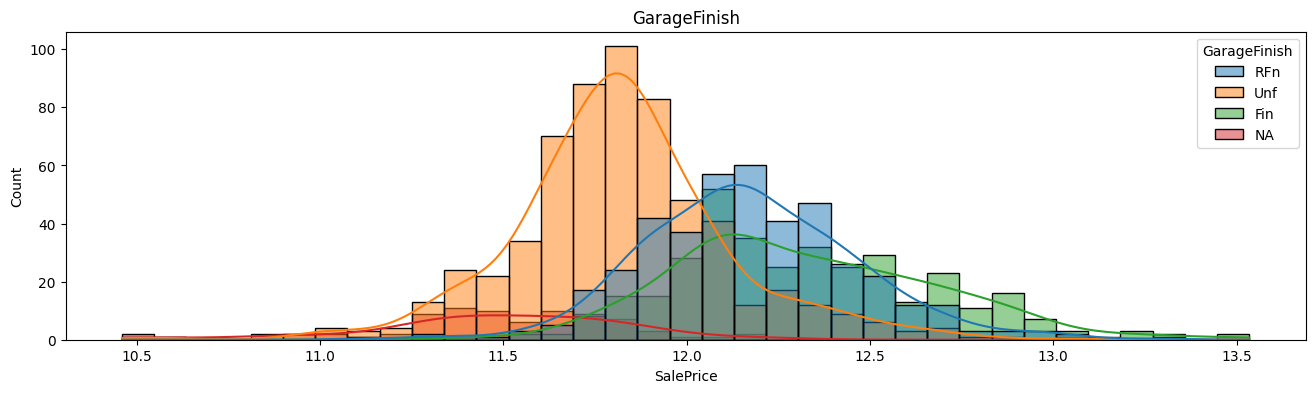

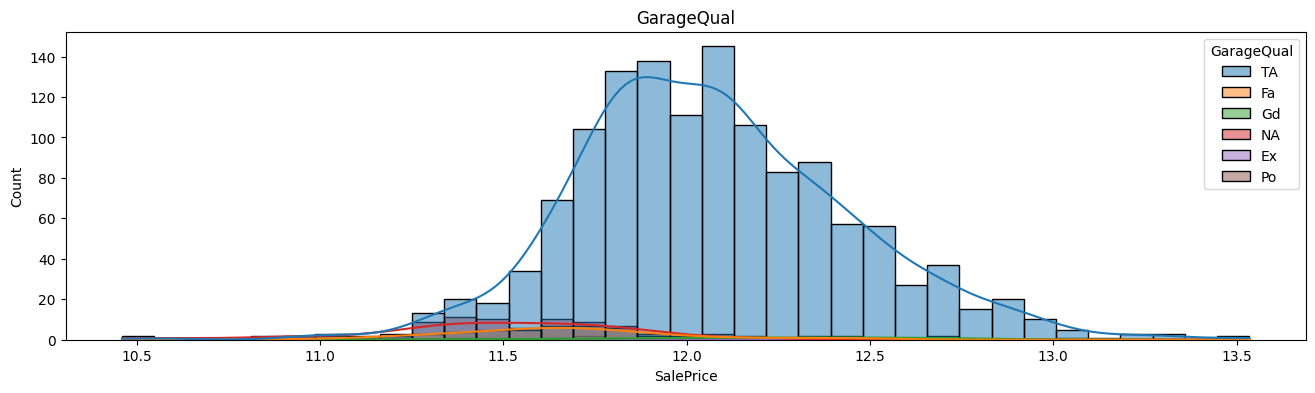

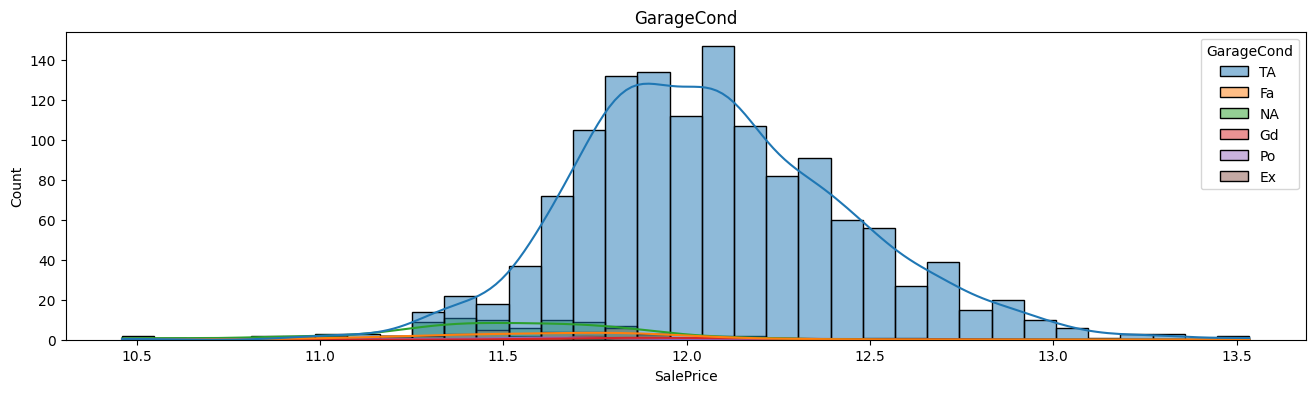

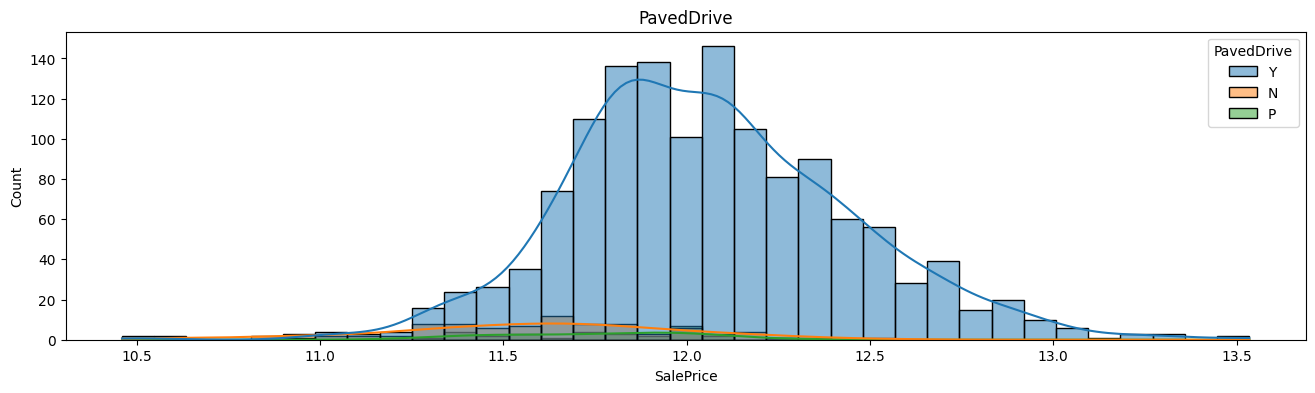

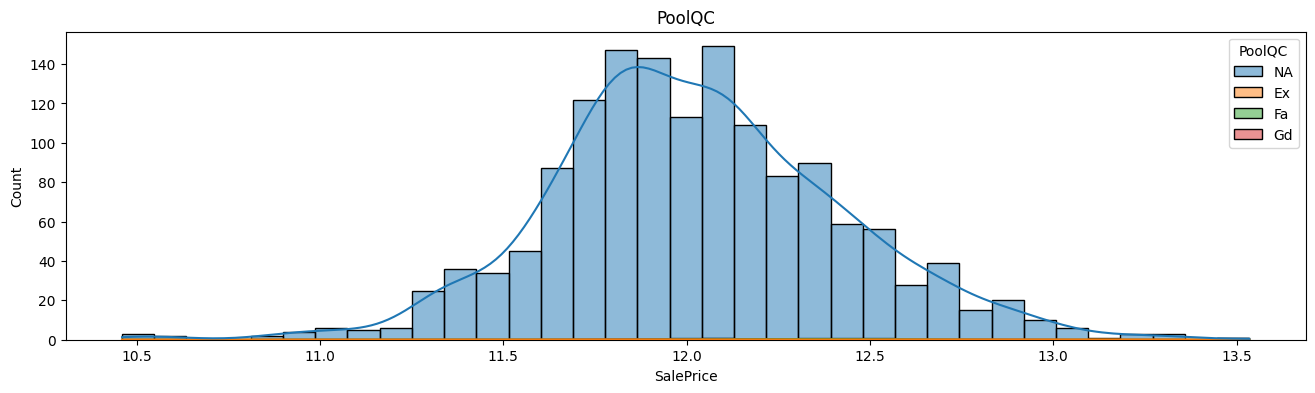

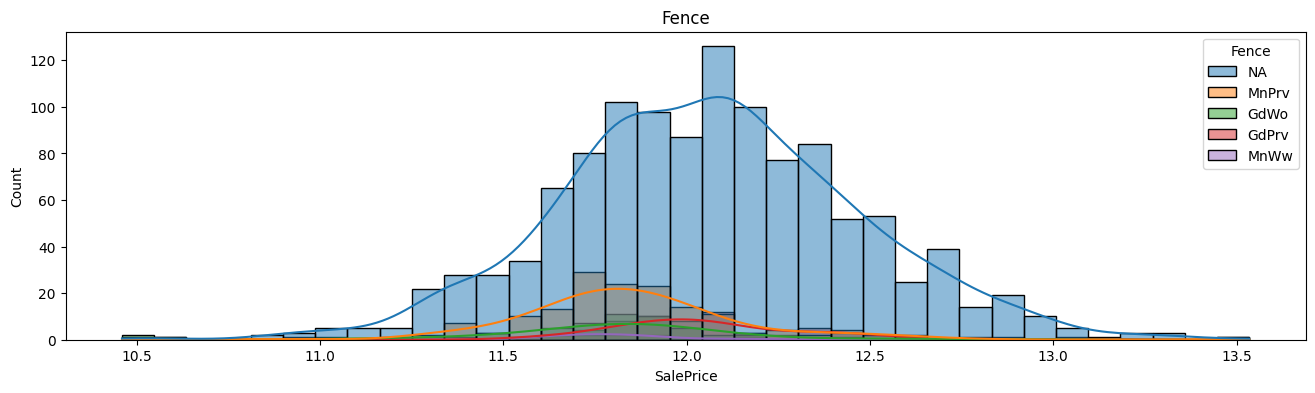

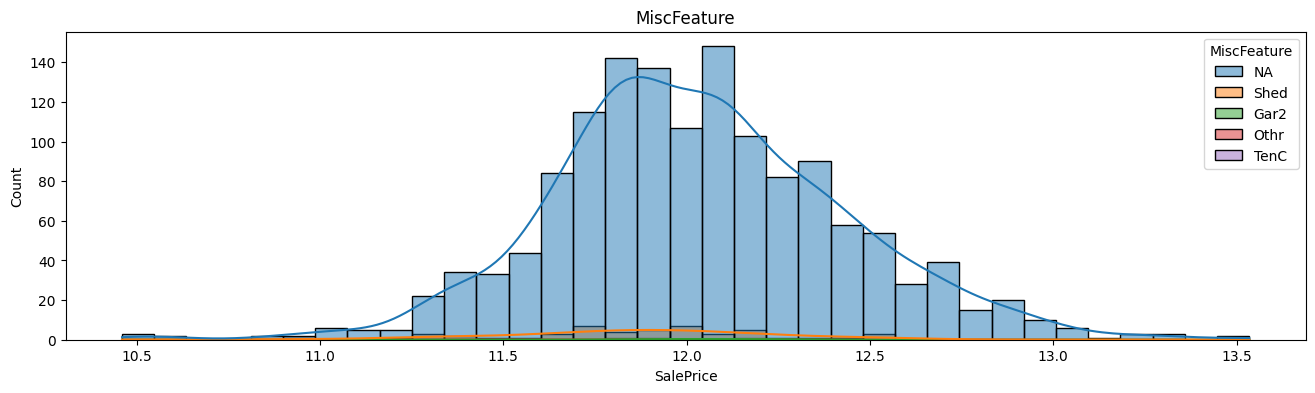

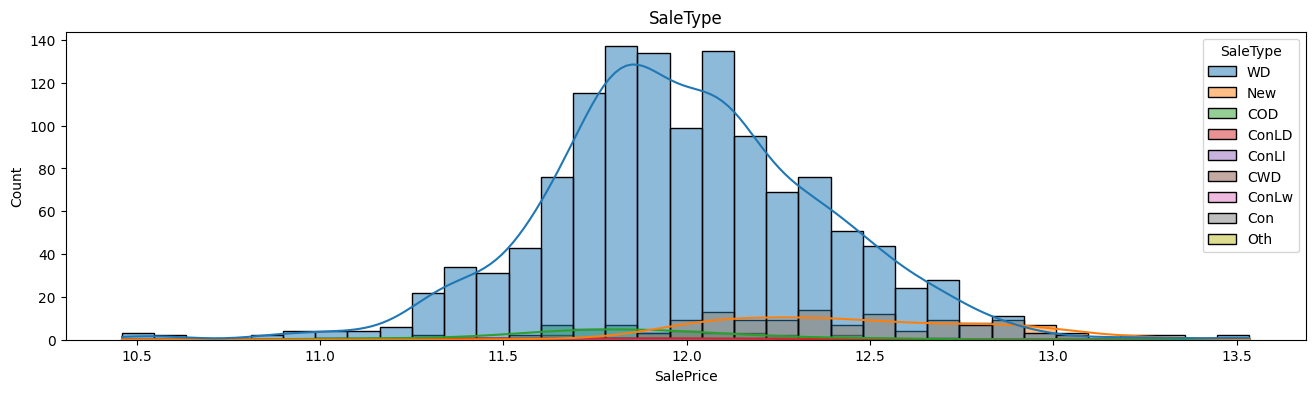

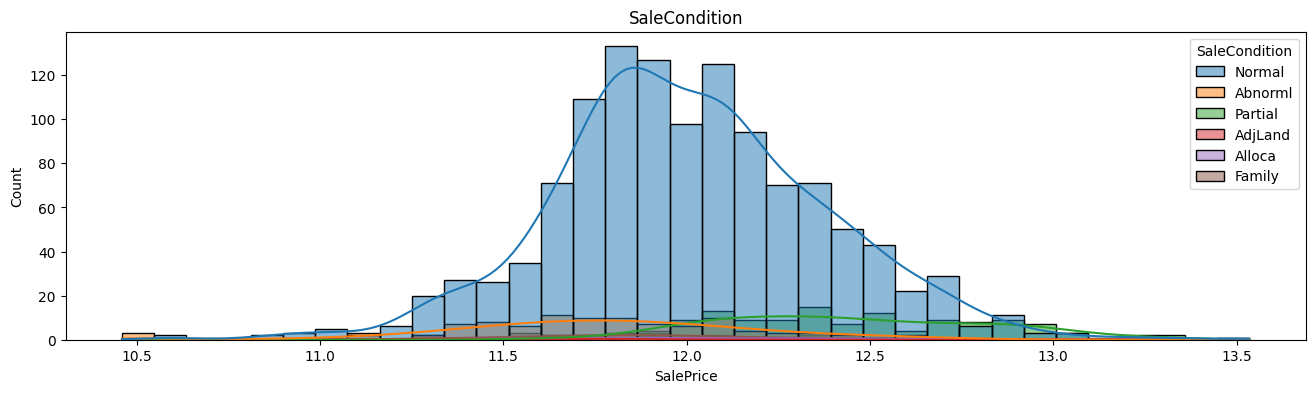

In [250]:
categorical_df['SalePrice'] = df['SalePrice']
for column in categorical_df:
    if column != 'SalePrice':
        plt.figure(figsize=(16, 4))
        sns.histplot(data = categorical_df, x = 'SalePrice', kde=True, hue=column).set_title(column)


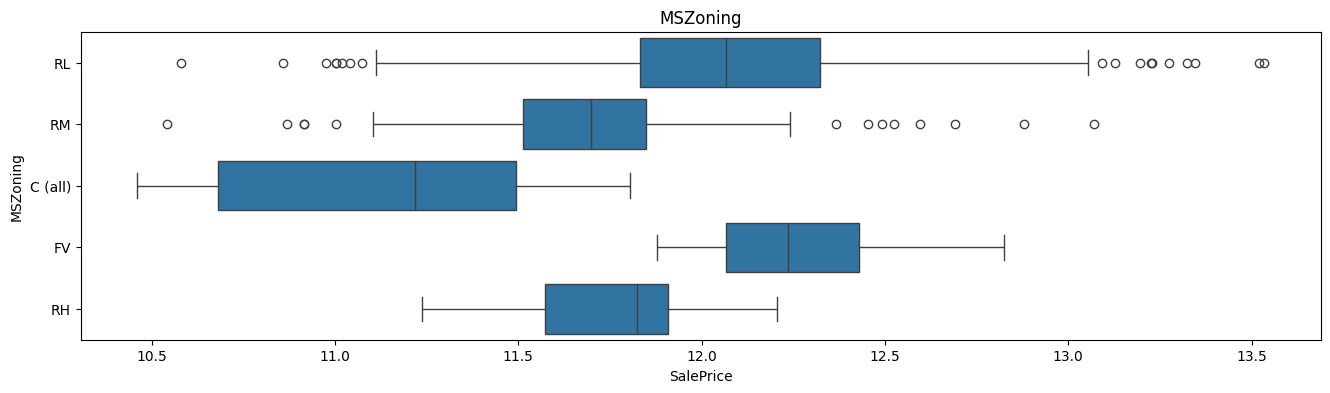

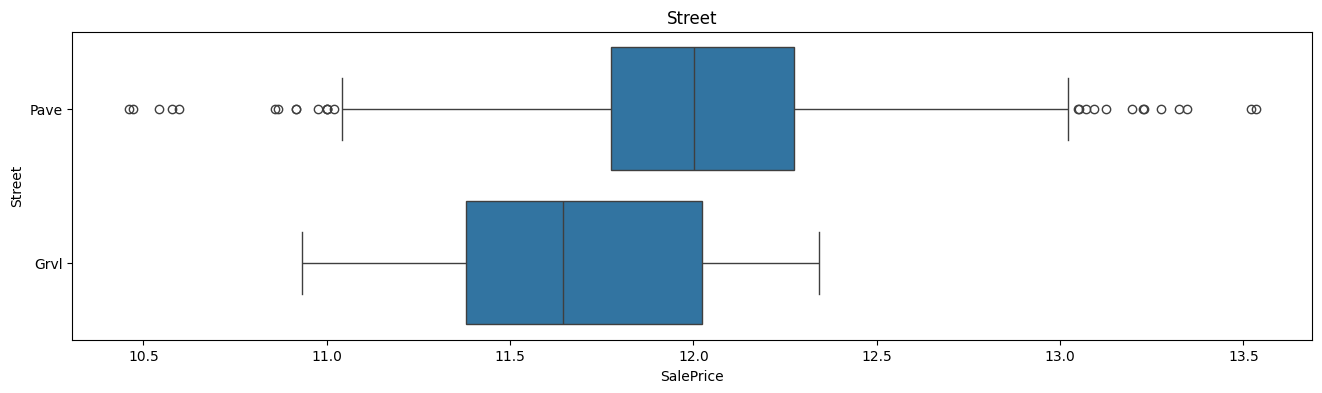

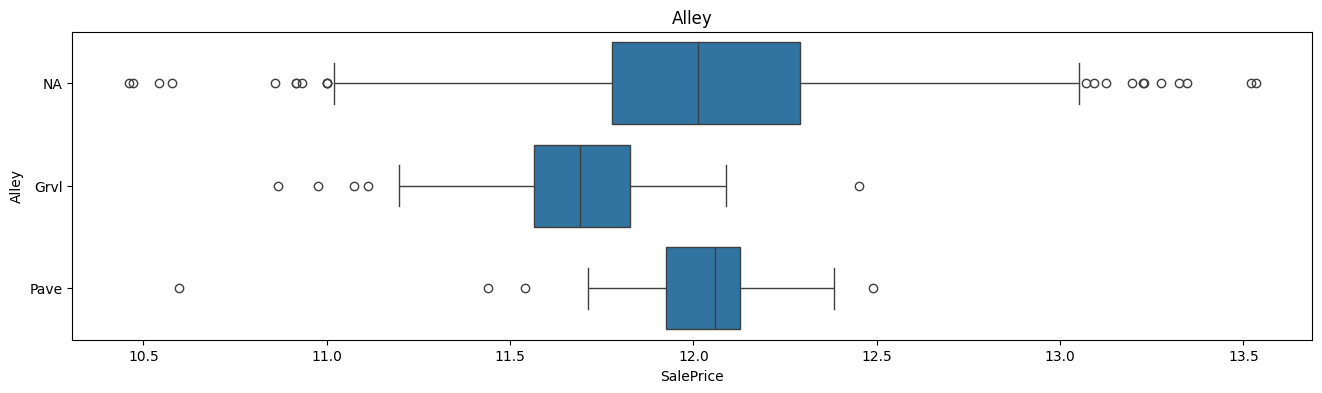

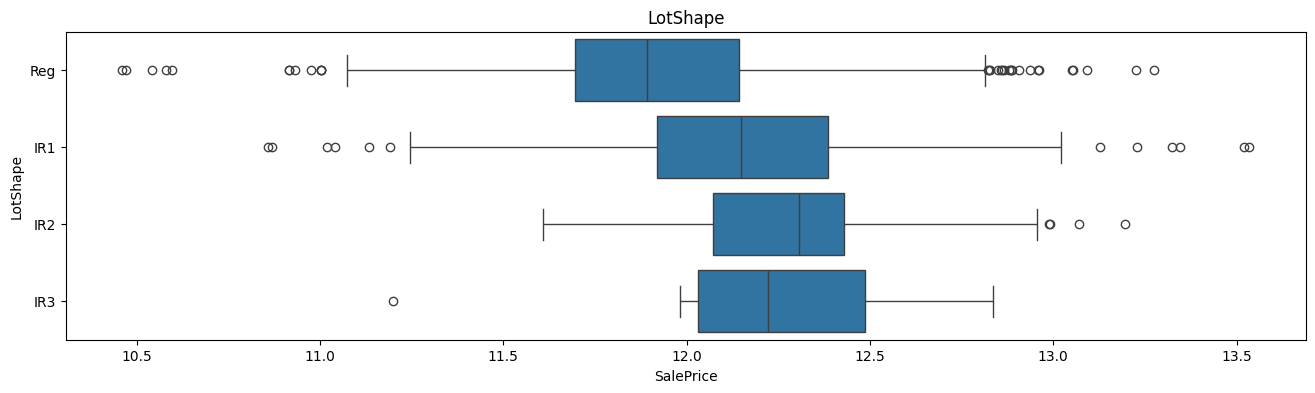

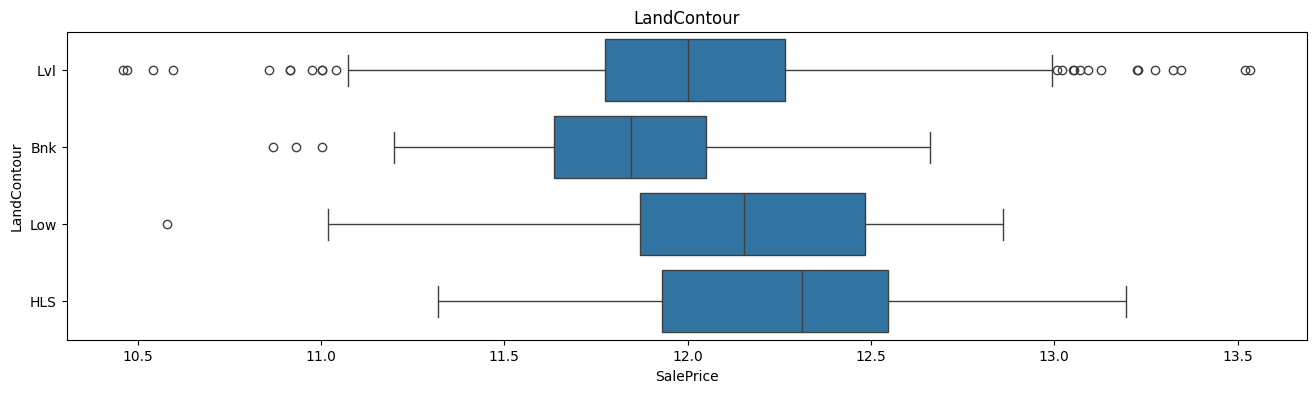

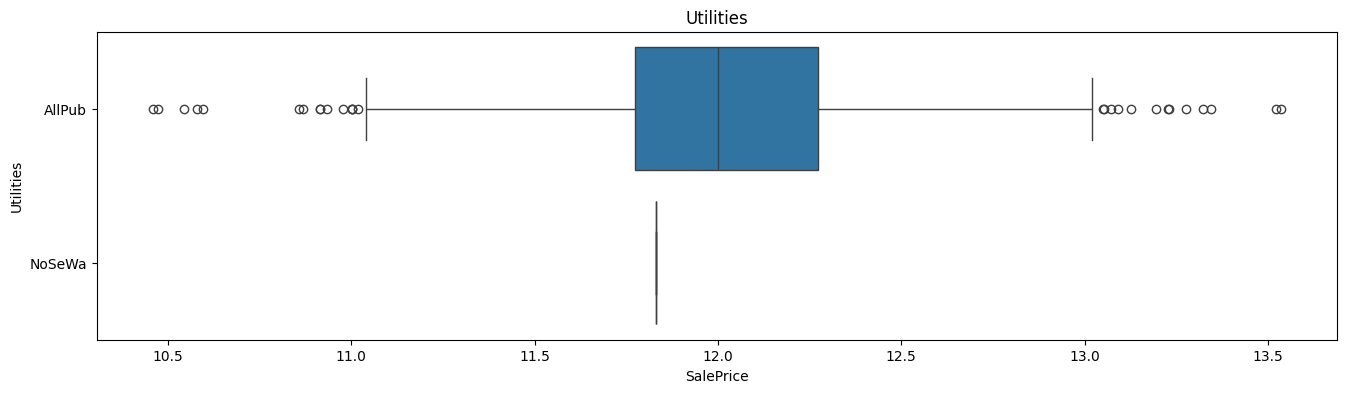

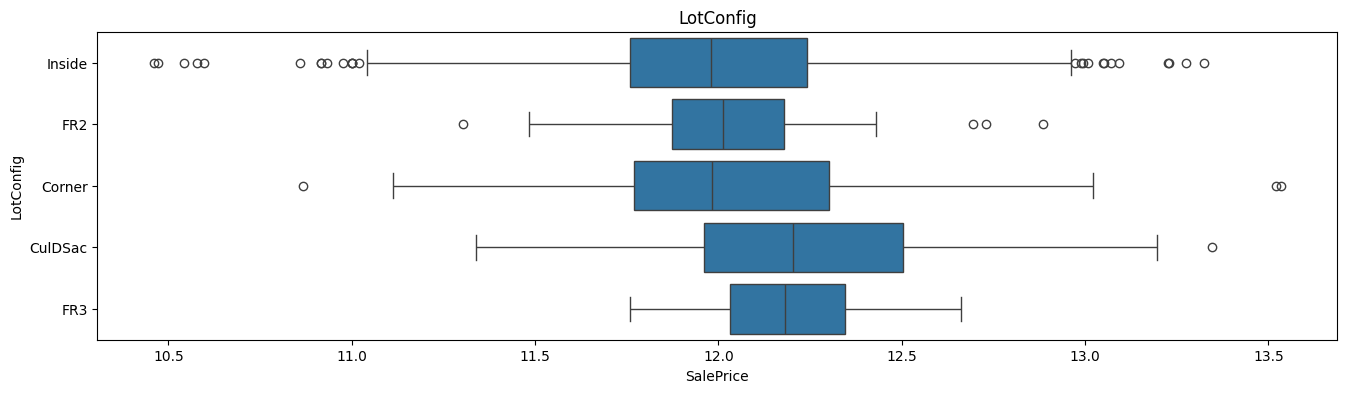

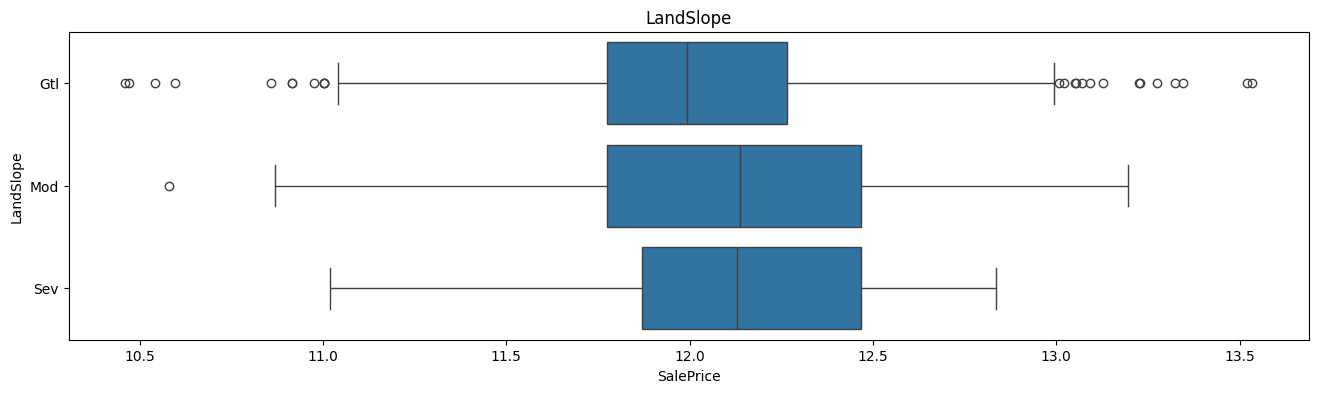

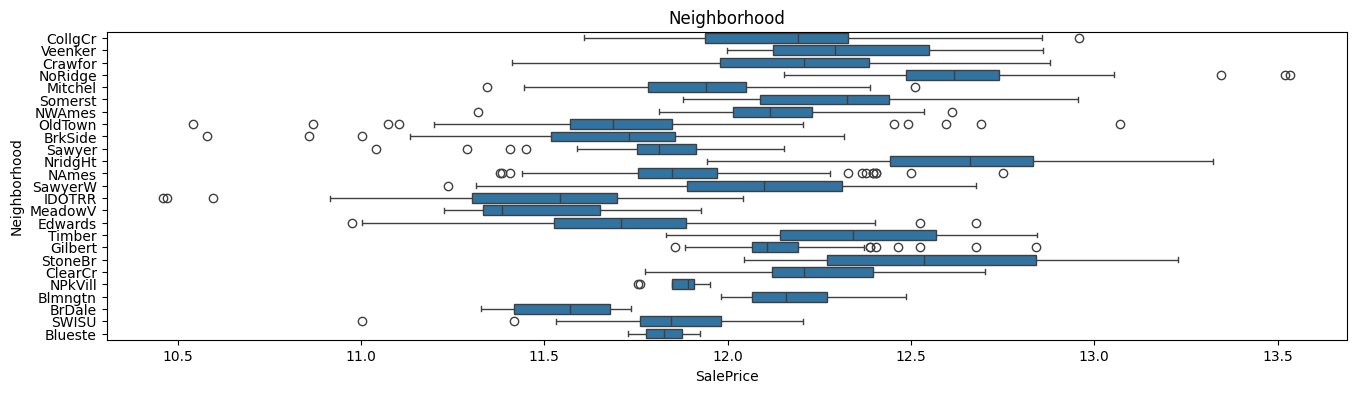

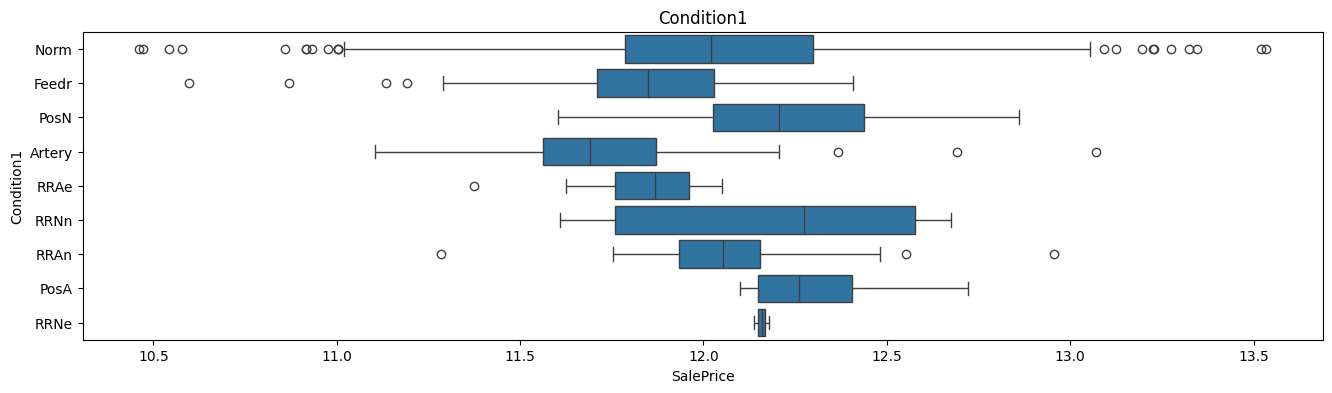

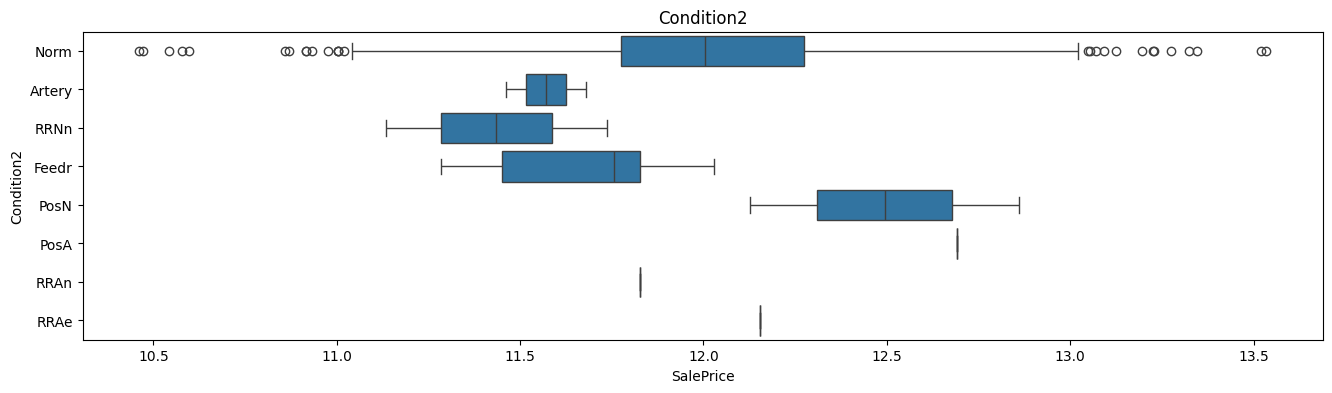

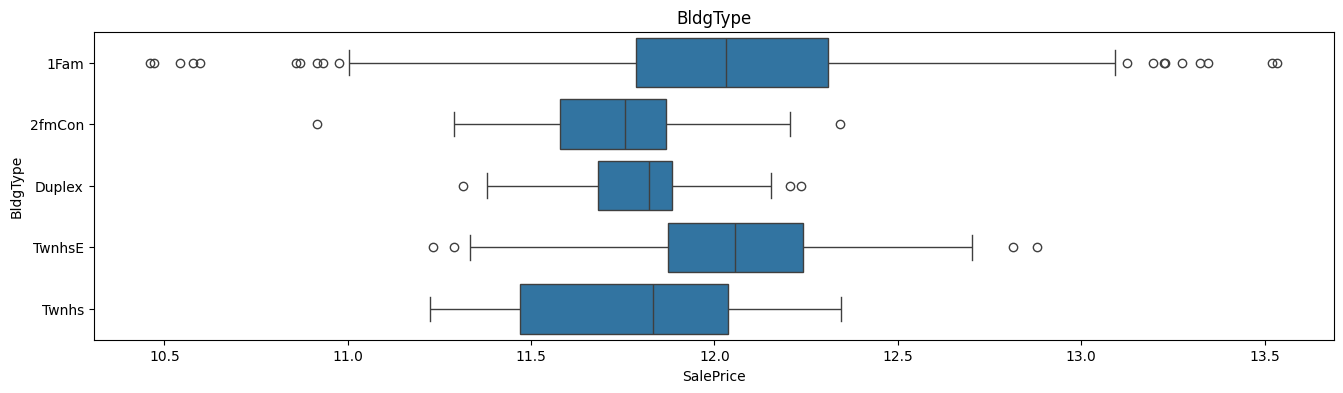

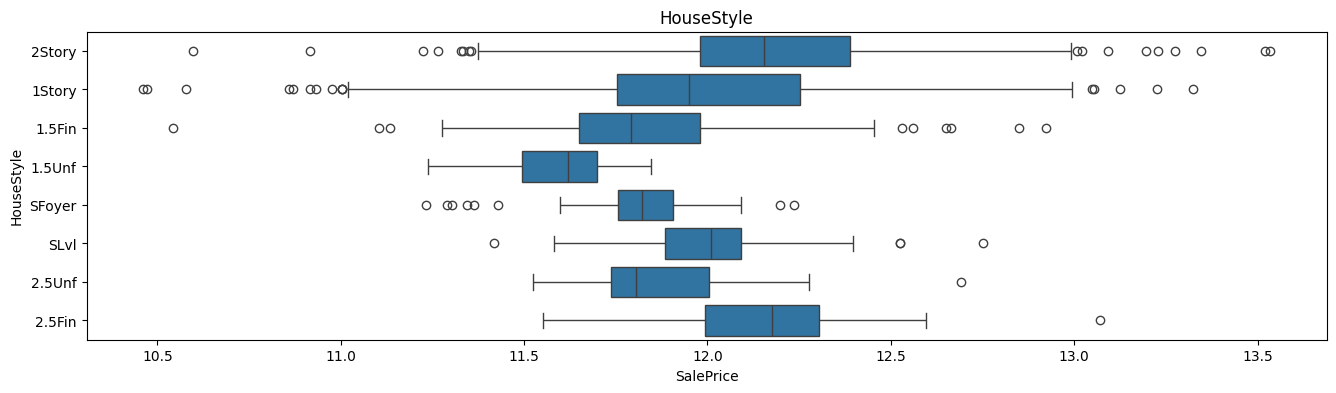

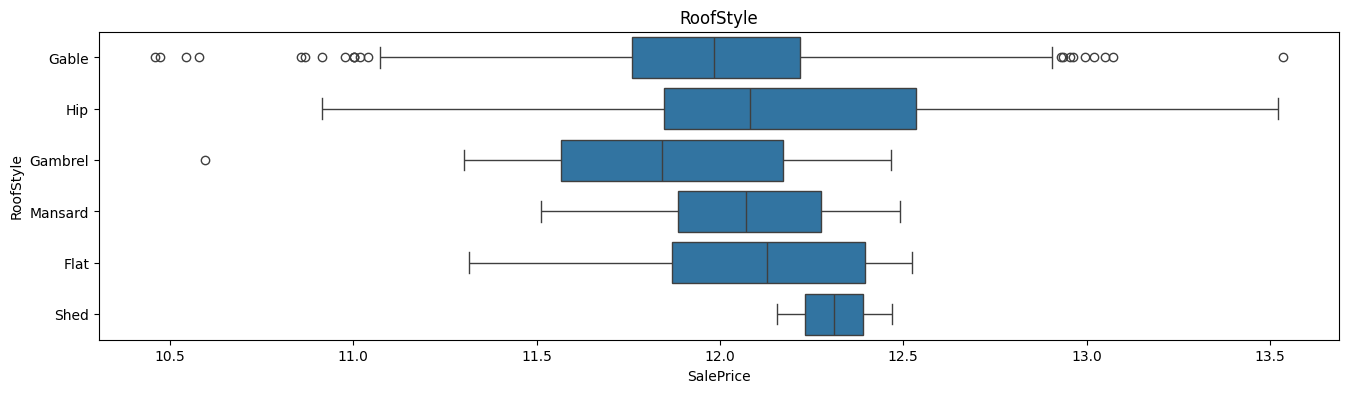

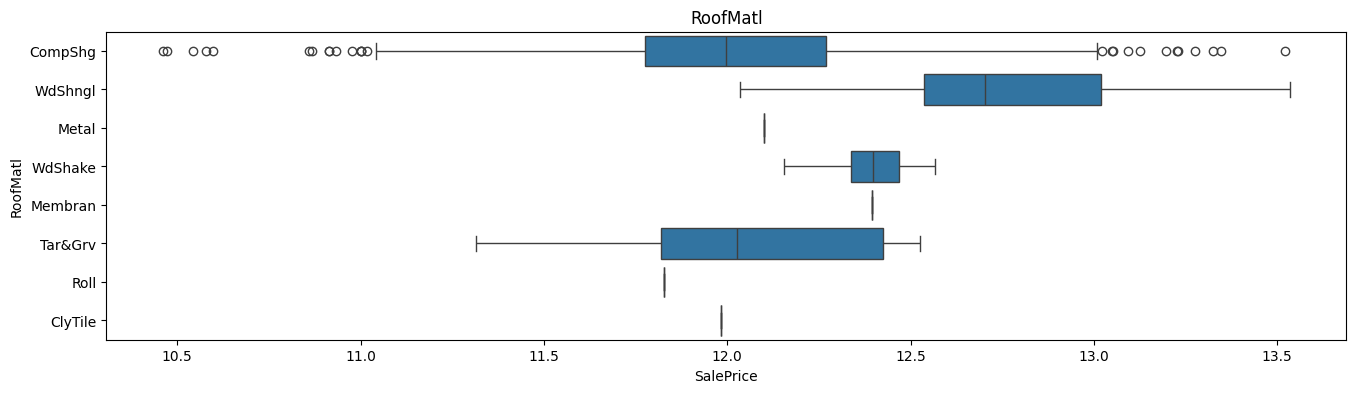

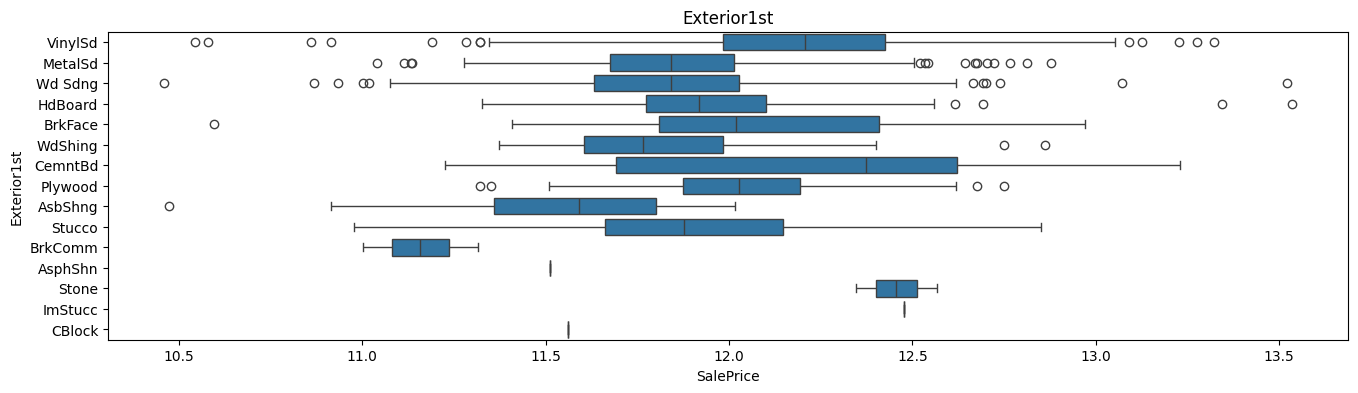

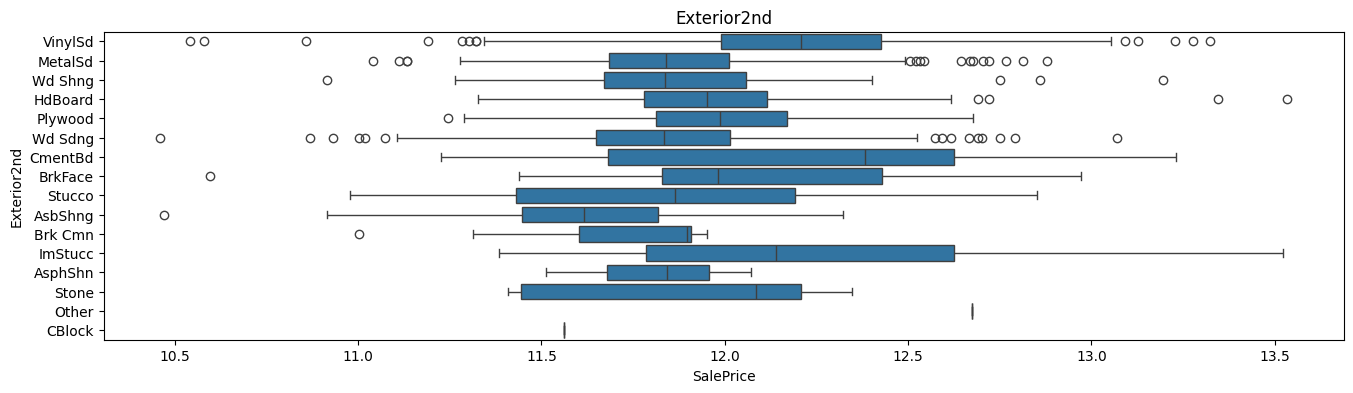

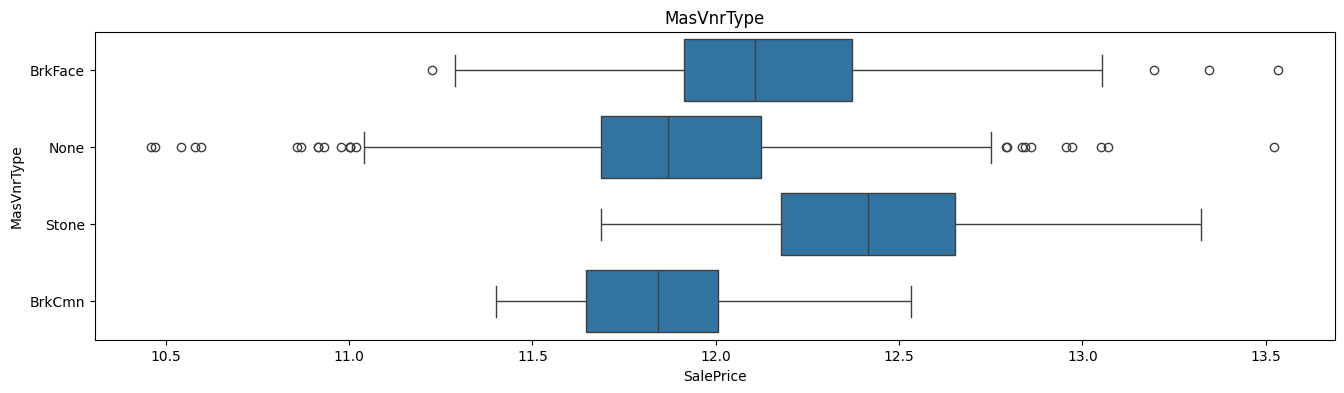

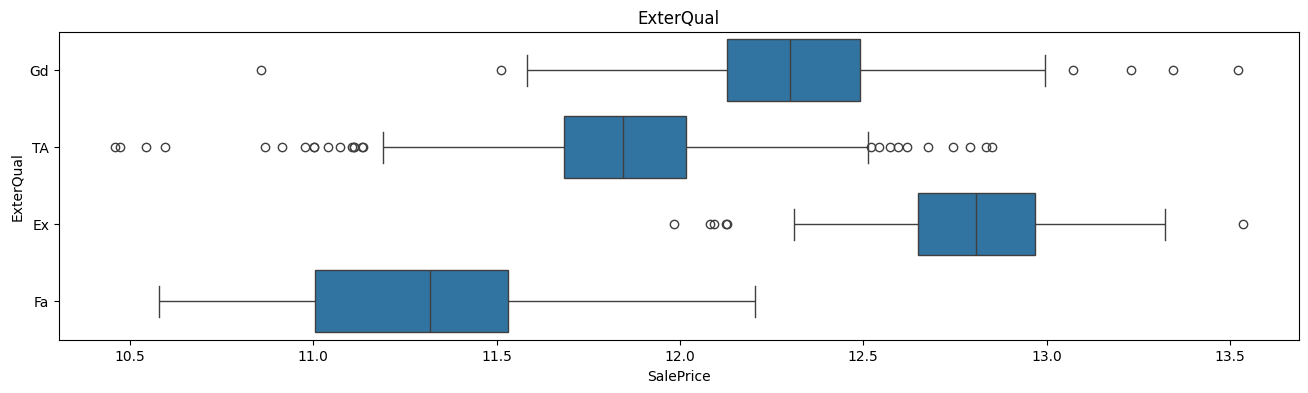

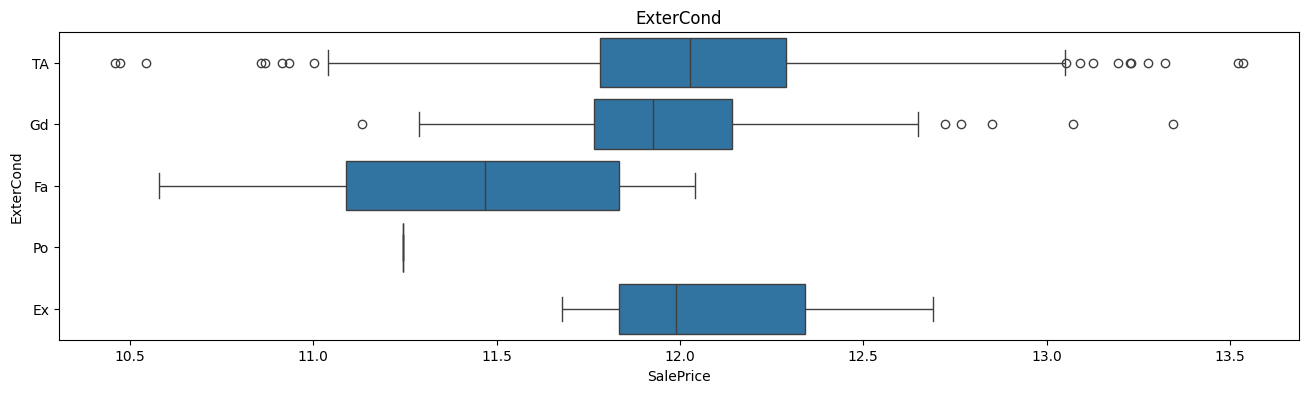

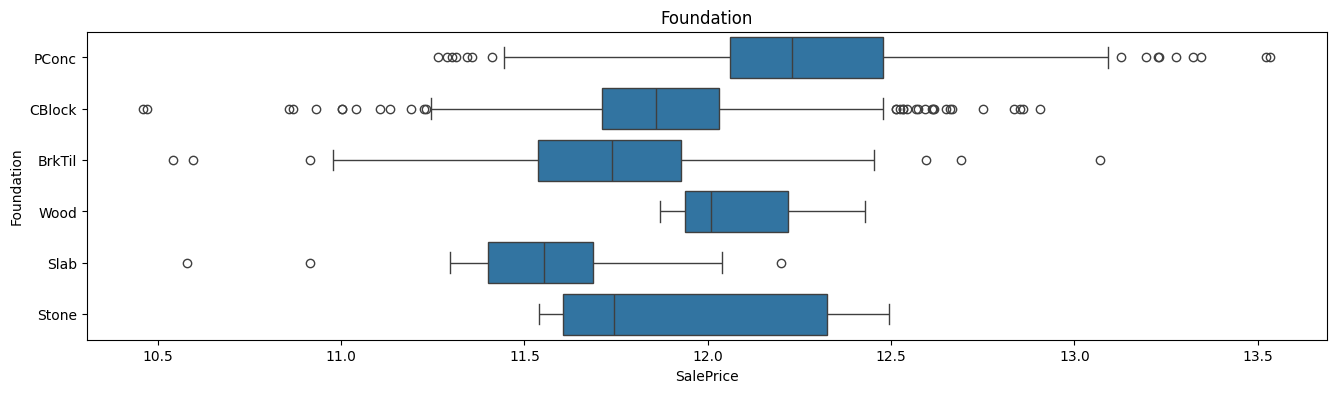

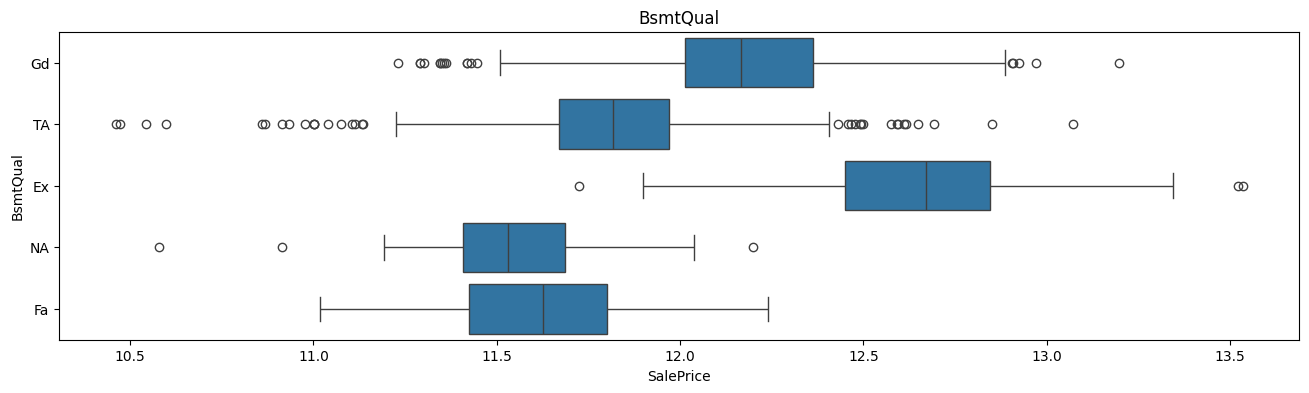

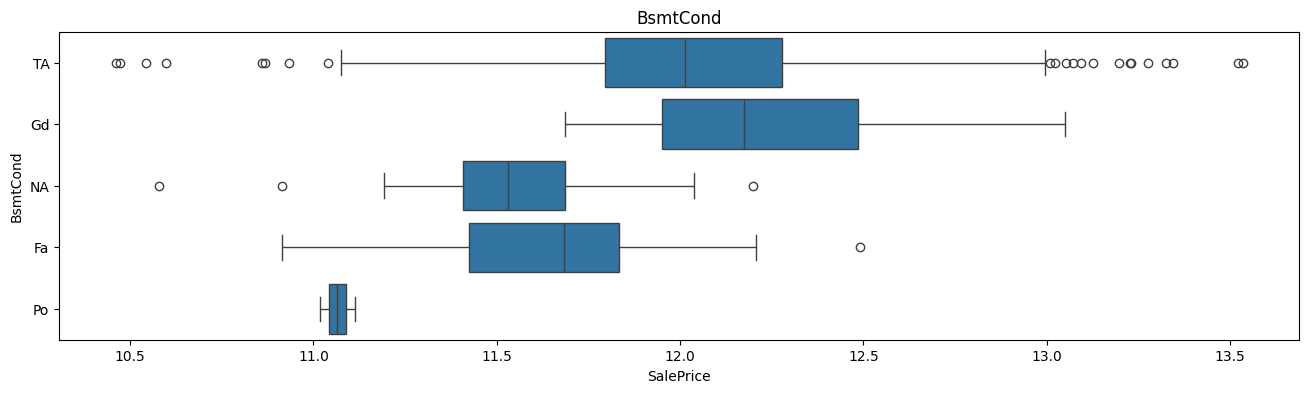

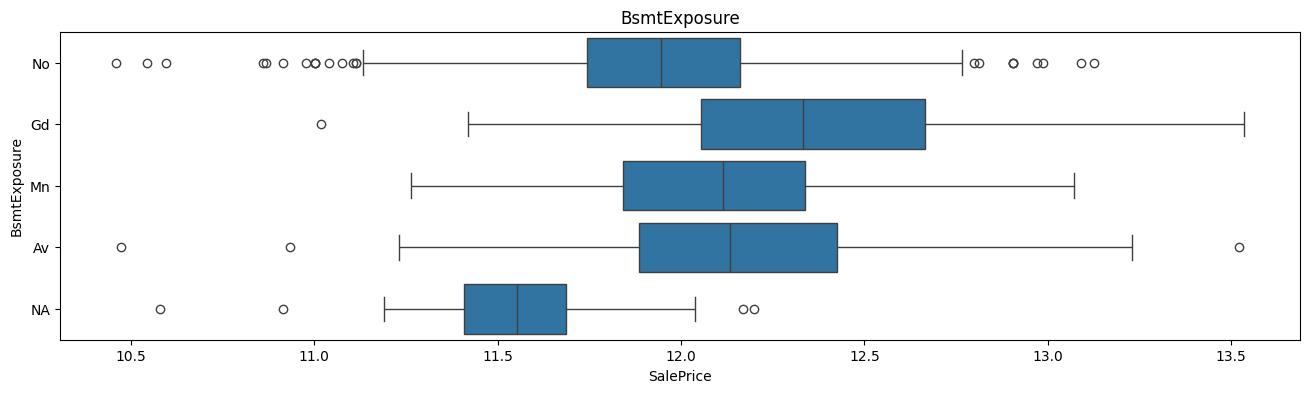

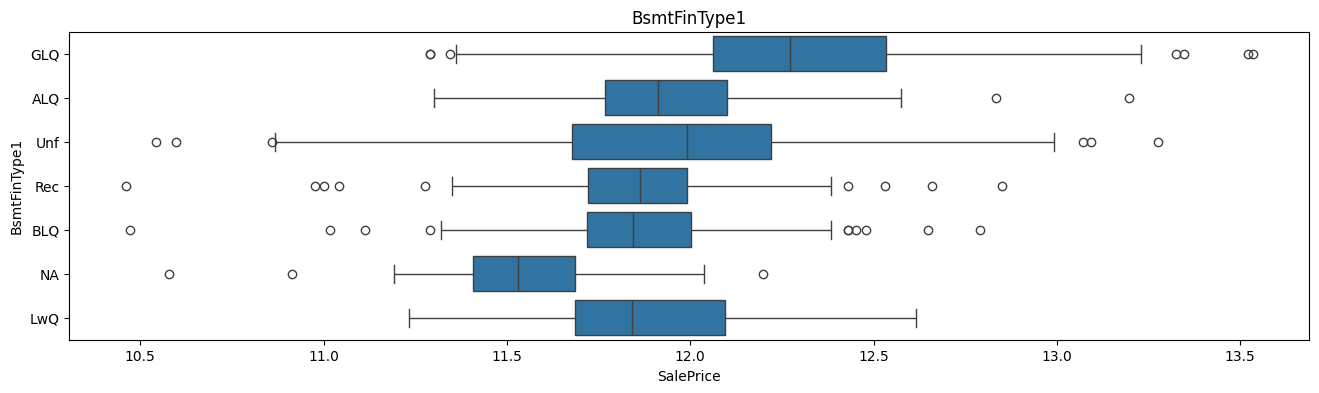

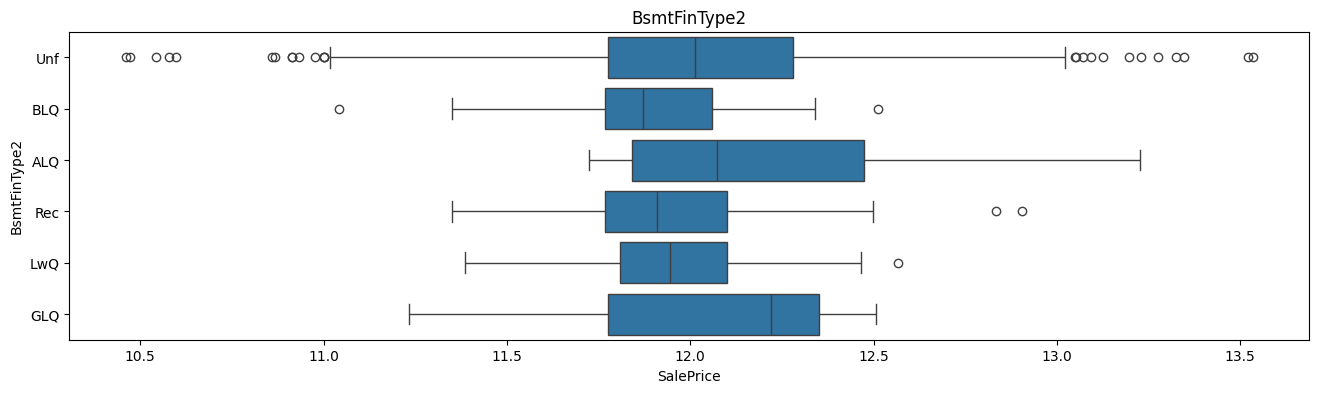

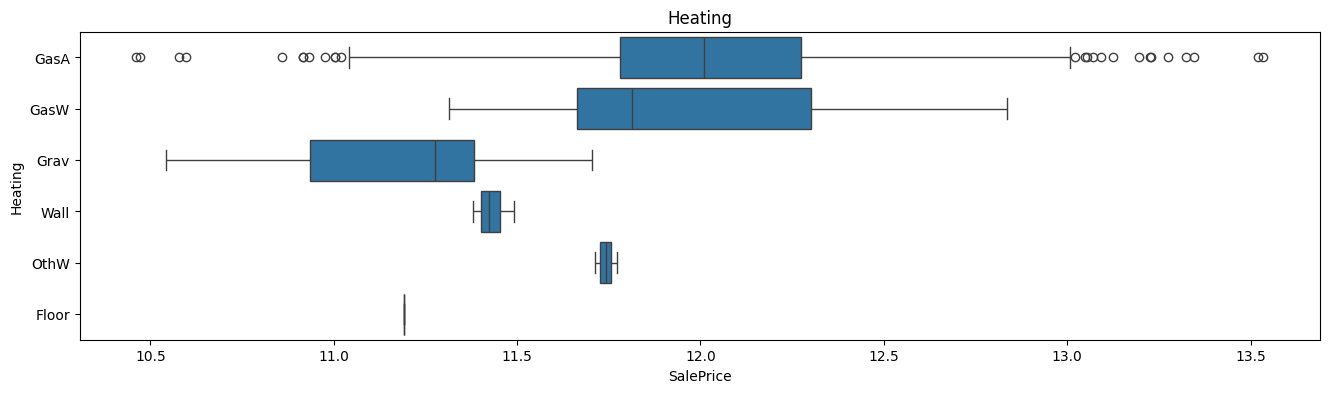

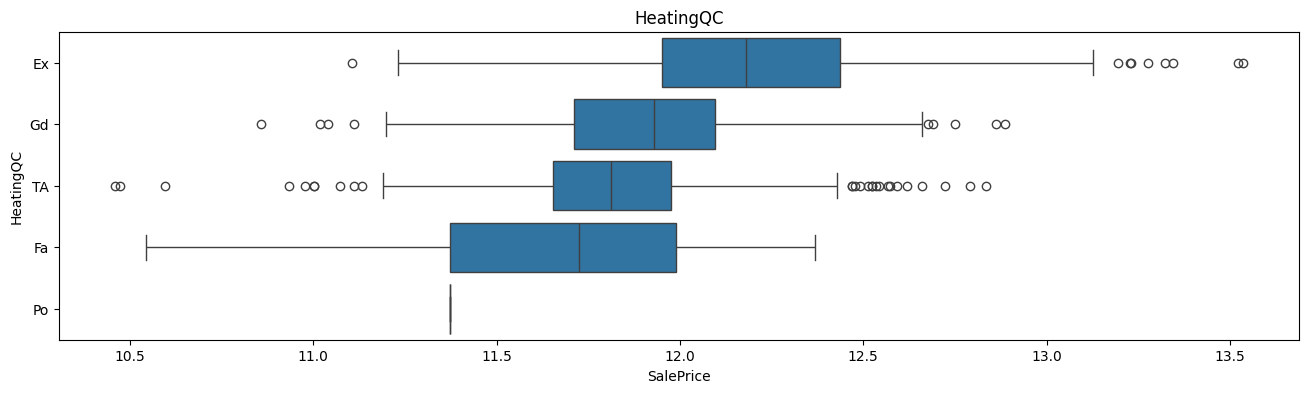

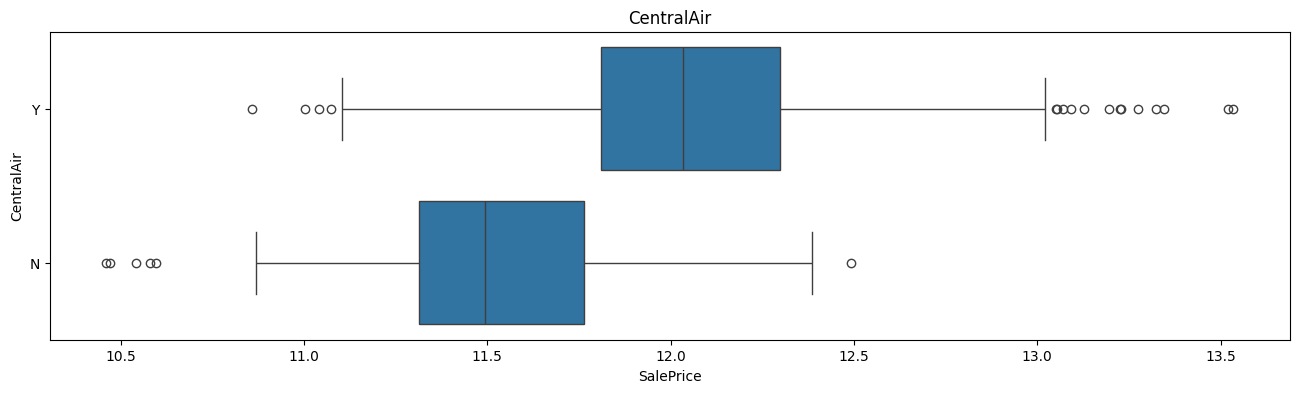

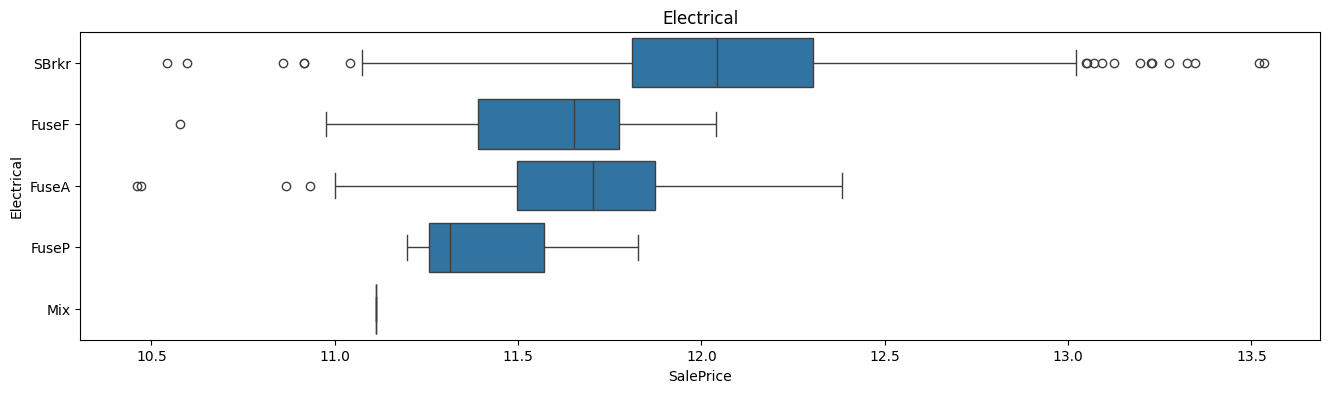

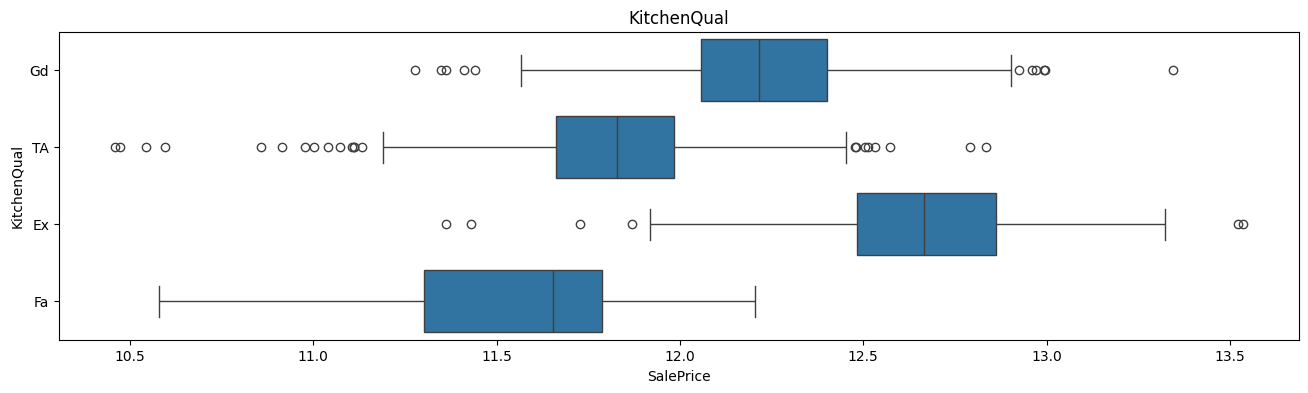

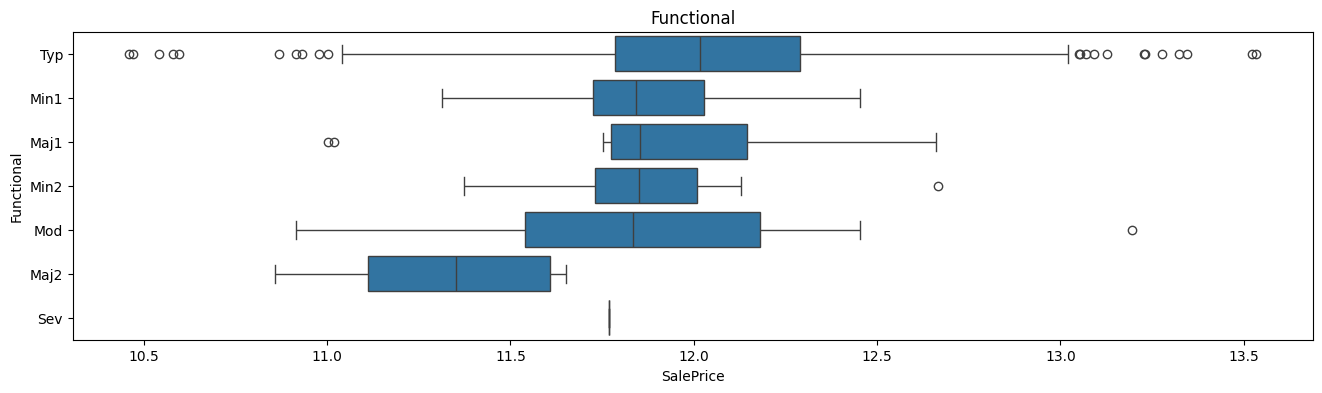

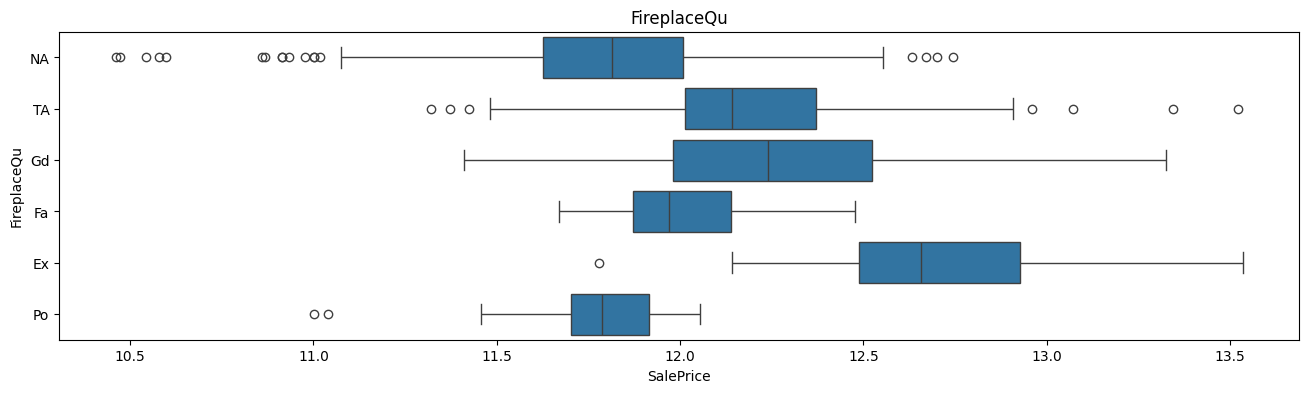

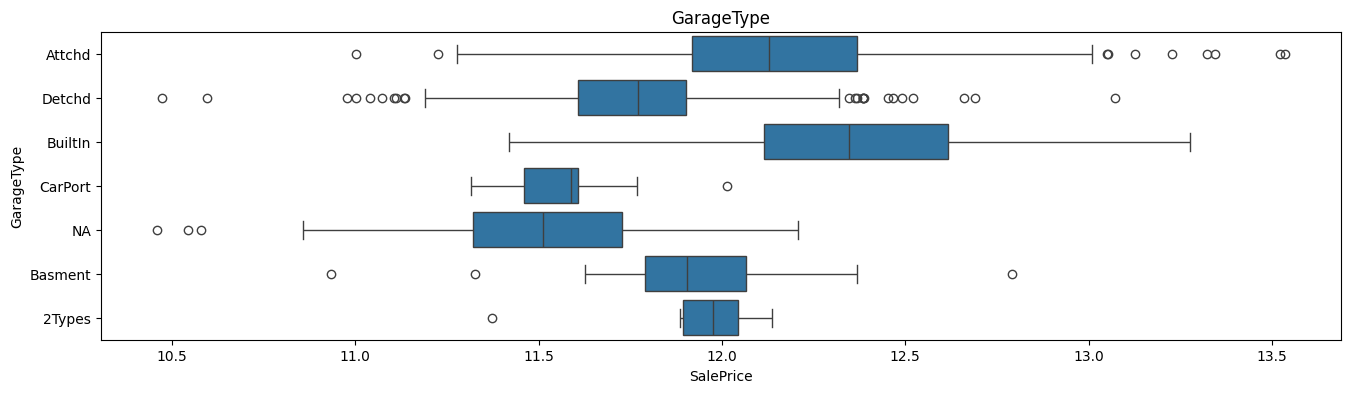

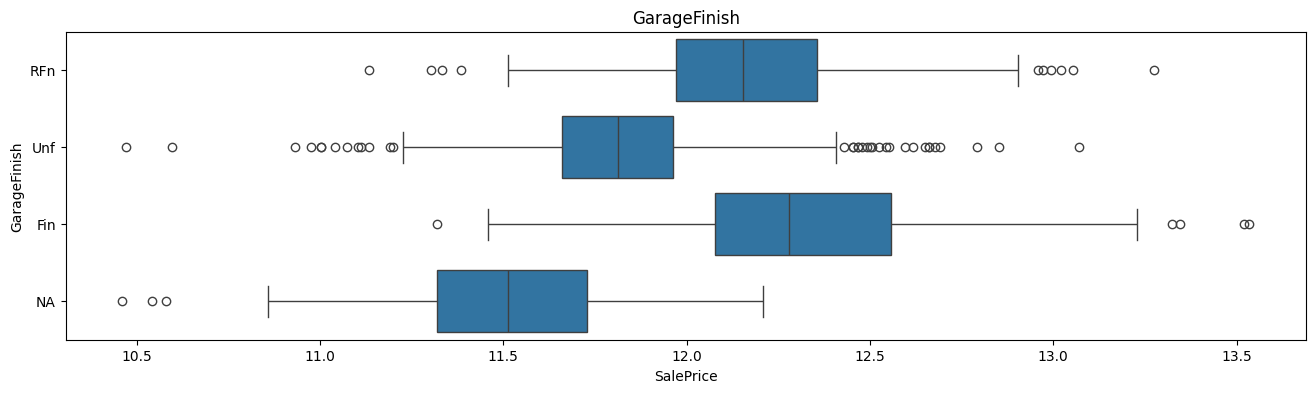

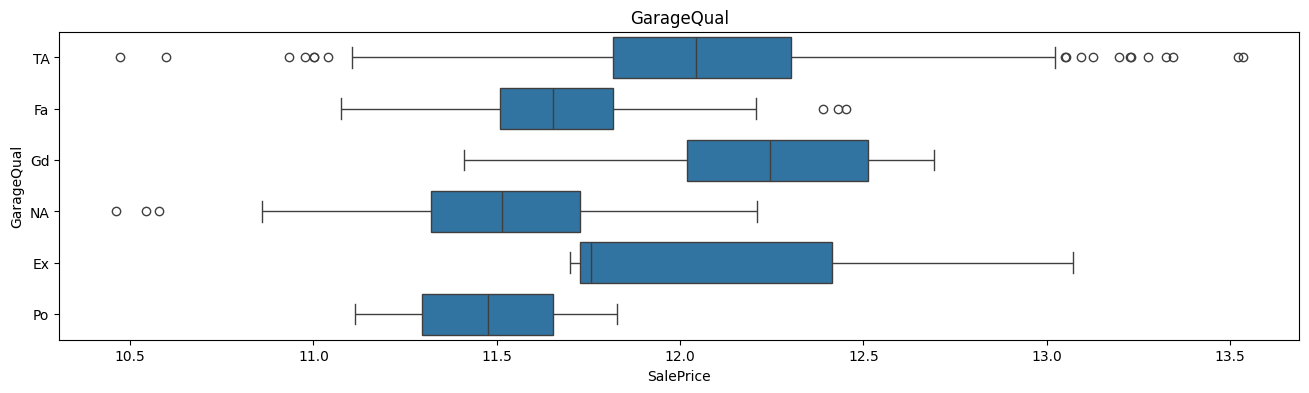

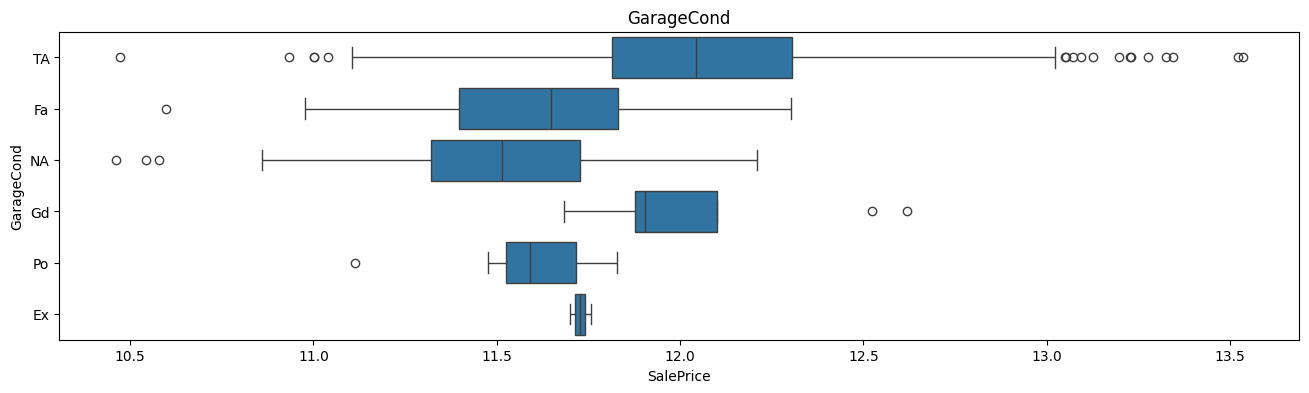

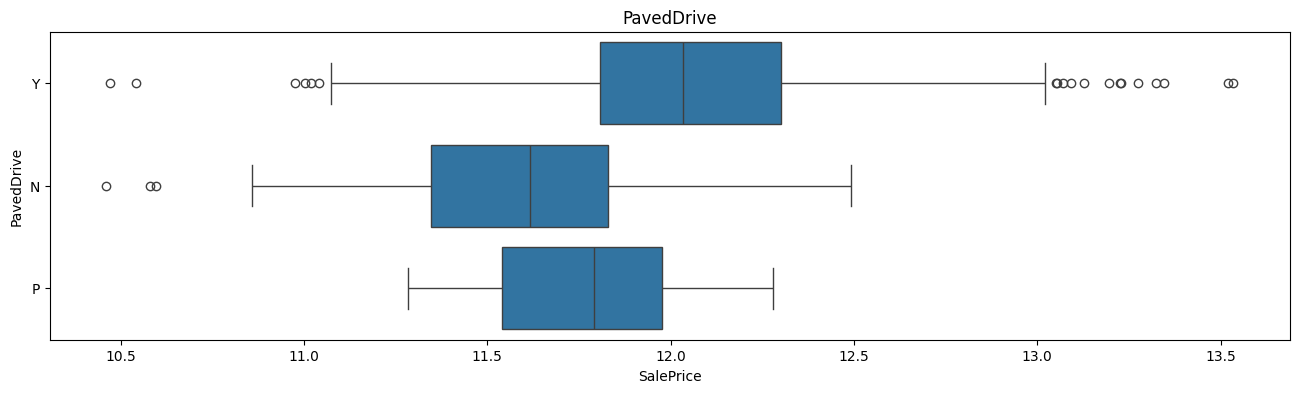

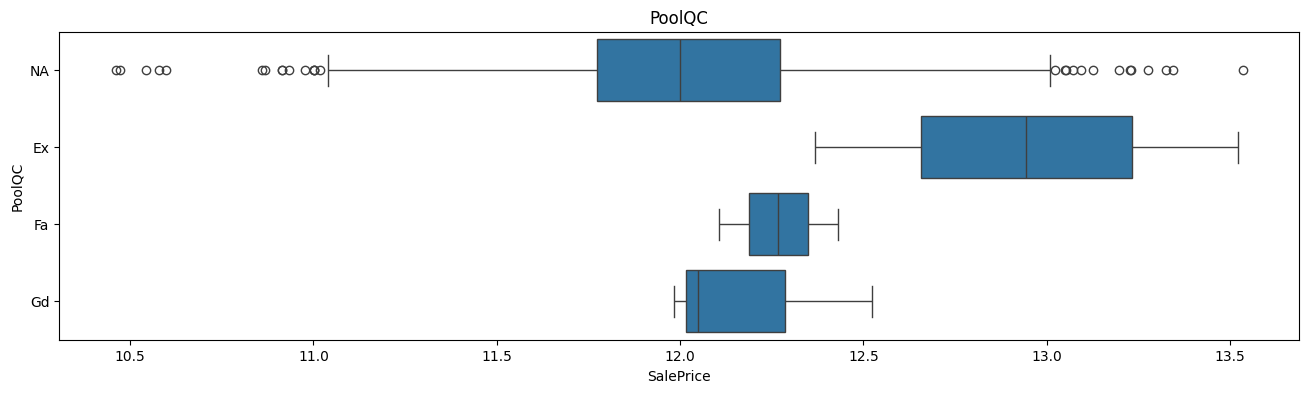

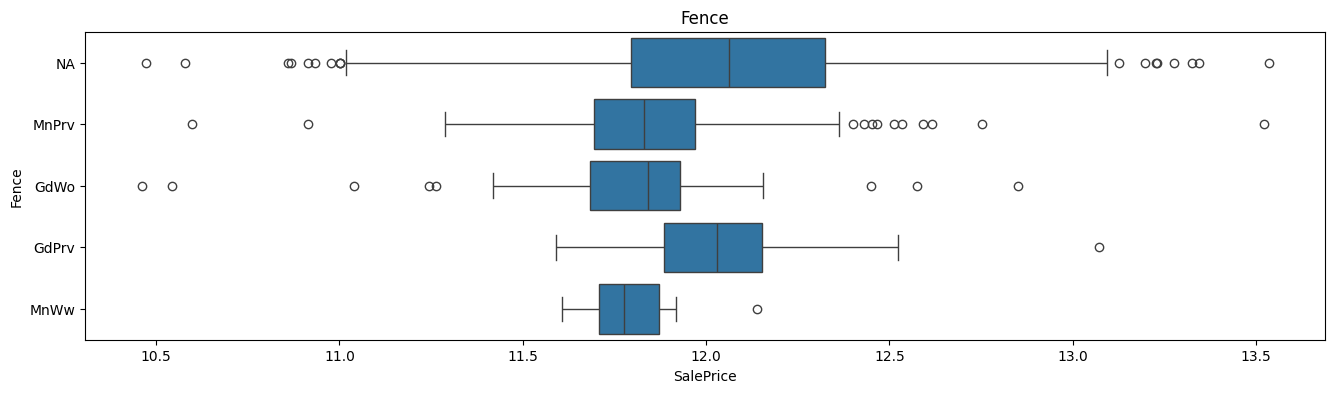

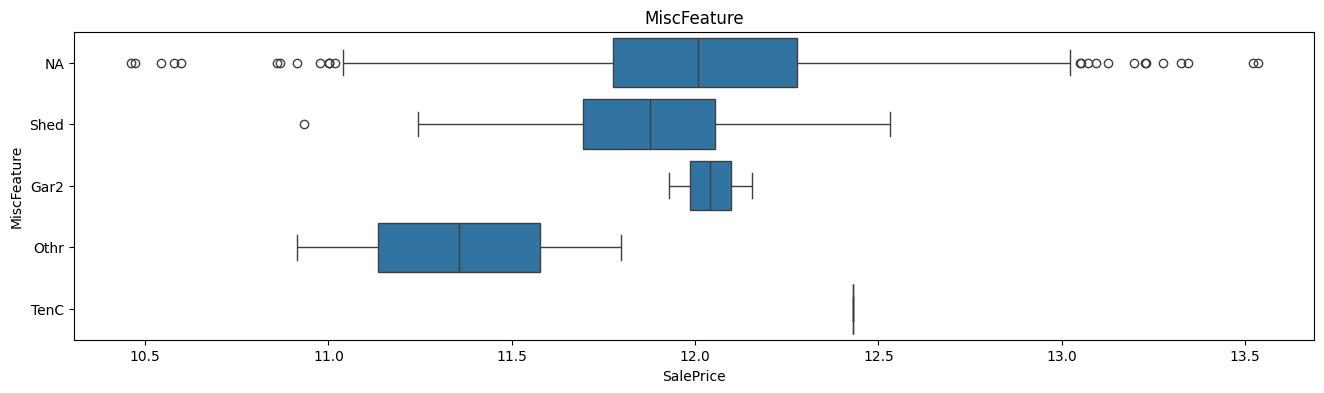

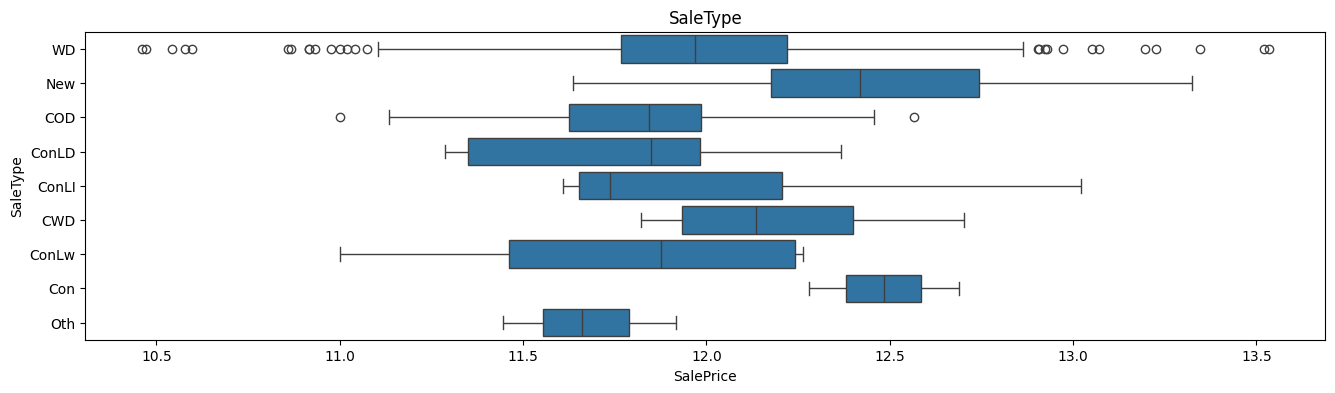

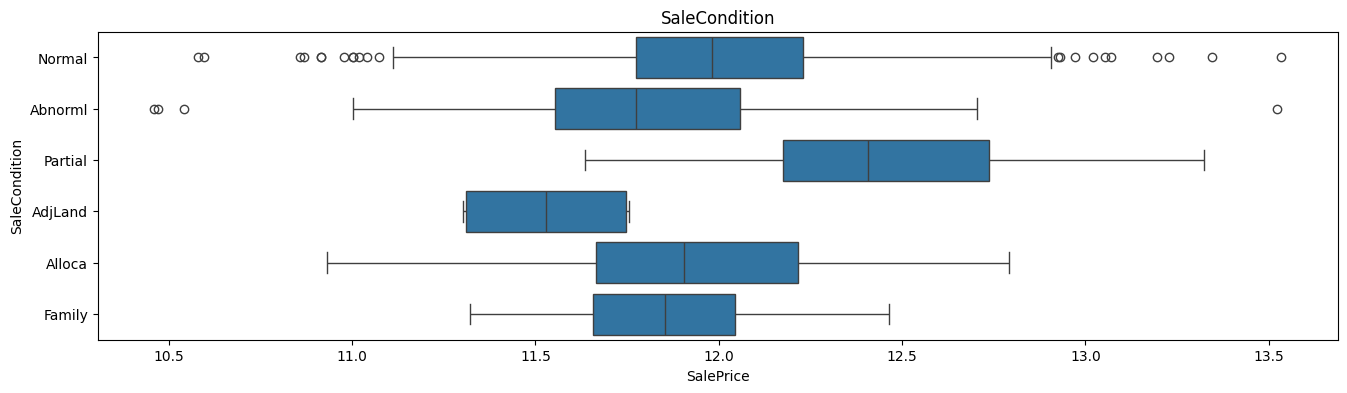

In [251]:
for column in categorical_df:
    if column != 'SalePrice':
        plt.figure(figsize=(16, 4))
        sns.boxplot(data = categorical_df, x = 'SalePrice', y = column).set_title(column)

In [252]:

# numerical_col_to_keep = ['Fireplaces', 'MasVnrArea', 'GarageYrBlt', 'V9', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'Class']
col_to_keep = categorical_df2.columns.tolist() + (numerical_col_to_keep)
print(col_to_keep)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice', 'Total_Bathrooms', 'Age', 'Total_Home_Quality']


In [253]:
# Label Encode the categorical data

for col in categorical_df.columns.tolist():
  encoder = LabelEncoder()
  encoded_values = encoder.fit_transform(df[col])
  df[col] = encoded_values

### 2.5. Feature Selection

In [254]:
df = df.dropna()
print(df.shape)
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

(1459, 82)


LinearRegression()

#### Feature Selection Using SequentialFeatureSelector 

In [255]:
sfs = SFS(model, n_features_to_select=20, cv=5, direction='forward')

sfs.fit(X_train, y_train)

support = sfs.get_support()
print('The selected features are:', sorted(list(X.columns[support])))


The selected features are: ['Age', 'BsmtQual', 'Fireplaces', 'Functional', 'GarageCars', 'GarageType', 'GrLivArea', 'HeatingQC', 'KitchenQual', 'LandSlope', 'LotShape', 'MSSubClass', 'MSZoning', 'OverallCond', 'OverallQual', 'SaleCondition', 'ScreenPorch', 'Total_Bathrooms', 'WoodDeckSF', 'YearRemodAdd']


Result from Reverse

The selected features are: ['1stFlrSF', 'Age', 'BsmtCond', 'BsmtFinSF2', 'BsmtQual', 'Fireplaces', 'Functional', 'GarageCars', 'GarageType', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual', 'LandSlope', 'LotShape', 'MSZoning', 'OverallCond', 'TotRmsAbvGrd', 'Total_Bathrooms', 'Total_Home_Quality', 'YearRemodAdd']

In [256]:
# Filter the features suggested by the SequentialFeatureSelector
filtered_df = df[list(X.columns[support])]


## 3. Modeling

Preparing the feature and label dataset for our machine learning model

In [257]:
# X = df.drop('SalePrice', axis=1)
X = filtered_df
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.1. Support Vector Machine Evaluation

In [258]:
svr = SVR()
svr.fit(X_train, y_train)
r2 = cross_val_score(svr, X_train, y_train, cv=5, n_jobs=-1, scoring="r2")
cvs = cross_val_score(svr, X_train, y_train, cv=5, n_jobs=-1, scoring="neg_root_mean_squared_error")
mean_rmse = -cvs.mean()
mean_r2 = r2.mean()

# Print individual metrics
print("R-squared:", mean_r2)
print("Root Mean squared error:", mean_rmse)

R-squared: 0.23729883237027405
Root Mean squared error: 147.39941080839986


### 3.2. Support Vector Machine Hyperparameter Optimization

In [259]:
# Define the SVR regressor
svr = SVR()

# Define the hyperparameters grid
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'epsilon': [0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'sigmoid', 'poly'],
    'degree': [2, 3, 4, 5, 6, 7, 8]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE with best parameters: {:.2f}".format(np.sqrt(mse)))


Best parameters found:  {'C': 100, 'degree': 4, 'epsilon': 0.1, 'kernel': 'poly'}
MSE with best parameters: 80.37


We notice an improvement in the loss function, RMSE,  after hyperparameter optimization from 147.39 to 80.37

In [260]:
# Access the scoring for each parameter combination
cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
params = cv_results['params']

# Print the scoring for each parameter combination
for mean_score, params in zip(mean_test_scores, params):
    print("Parameters:", params)
    print("Mean test score:", mean_score)
    print()

Parameters: {'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean test score: -167.9829054920352

Parameters: {'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'kernel': 'sigmoid'}
Mean test score: -170.41015908561323

Parameters: {'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'kernel': 'poly'}
Mean test score: -165.2041143504155

Parameters: {'C': 0.1, 'degree': 2, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean test score: -167.98213136343685

Parameters: {'C': 0.1, 'degree': 2, 'epsilon': 0.01, 'kernel': 'sigmoid'}
Mean test score: -170.4060392890836

Parameters: {'C': 0.1, 'degree': 2, 'epsilon': 0.01, 'kernel': 'poly'}
Mean test score: -165.2041143504155

Parameters: {'C': 0.1, 'degree': 2, 'epsilon': 0.001, 'kernel': 'rbf'}
Mean test score: -167.98213136343685

Parameters: {'C': 0.1, 'degree': 2, 'epsilon': 0.001, 'kernel': 'sigmoid'}
Mean test score: -170.40572142197485

Parameters: {'C': 0.1, 'degree': 2, 'epsilon': 0.001, 'kernel': 'poly'}
Mean test score: -165.20411435041552

Parameters: {'C':

## 4. Compare with other Models

### 4.1. Evaluating the Competing Model

In [261]:
def evaluate_model(X_train, y_train, X_test, y_test, model):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Calculate evaluation metrics
    r2 = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring="r2")
    cvs = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1, scoring="neg_root_mean_squared_error")
    mean_rmse = -cvs.mean()
    mean_r2 = r2.mean()

    # Print individual metrics
    print("__________________________________________________________________________________________________________________________________")
    print(model)
    print("R-squared:", mean_r2)
    print("Root Mean squared error:", mean_rmse)

    if model == xgbmodel:
        # Get the feature importance
        importances = model.feature_importances_

        # Create a dataframe with feature importance
        feature_importances = pd.DataFrame({
            "feature": X_train.columns,
            "importance": importances
        })

        # Sort the dataframe by importance
        feature_importances = feature_importances.sort_values(by="importance", ascending=False)

        # Print the top 10 most important features
        print(feature_importances.head(25))

    
    return mean_r2, mean_rmse

models = {
    "Linear Regression": LinearRegression(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "Decision Forest": DecisionTreeRegressor(),
    "XGB Regressor": xgb.XGBRegressor(),
    "Support Vector Machine": SVR(kernel=grid_search.best_params_['kernel'], 
                     C=grid_search.best_params_['C'], 
                     epsilon=grid_search.best_params_['epsilon'], 
                     degree=grid_search.best_params_['degree']),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "Logistic Regression": LogisticRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
}

r2_scores = []
rmse_scores = []

for model_name, model in models.items():
    mean_r2, mean_rmse = evaluate_model(X_train, y_train, X_test, y_test, model)
    r2_scores.append((model_name, mean_r2))
    rmse_scores.append((model_name, mean_rmse))

__________________________________________________________________________________________________________________________________
LinearRegression()
R-squared: 0.8595780735264494
Root Mean squared error: 62.421857212751306
__________________________________________________________________________________________________________________________________
GaussianNB()
R-squared: 0.6122802227043108
Root Mean squared error: 104.89058210019991
__________________________________________________________________________________________________________________________________
RandomForestClassifier(random_state=42)
R-squared: 0.7562087102853654
Root Mean squared error: 83.1088831990568
__________________________________________________________________________________________________________________________________
DecisionTreeRegressor()
R-squared: 0.7649191192749105
Root Mean squared error: 83.8682402447927
________________________________________________________________________________________

### 4.2. Results Visualized

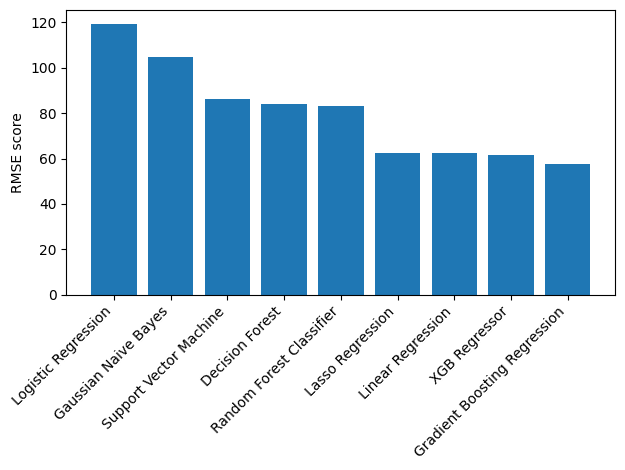

In [262]:
sorted_mean_rmse = sorted(rmse_scores, key=lambda x: x[1], reverse=True)
model_names, rsme_values = zip(*sorted_mean_rmse)

fig, ax = plt.subplots()
ax.bar(model_names, rsme_values)
ax.set_ylabel('RMSE score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

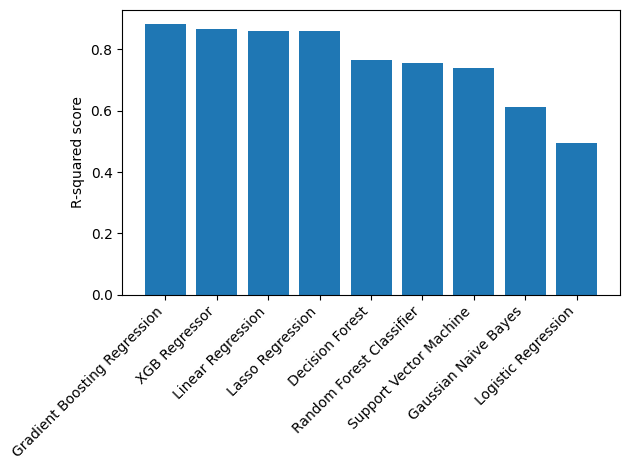

In [263]:
sorted_r2_scores = sorted(r2_scores, key=lambda x: x[1], reverse=True)
model_names, r2_values = zip(*sorted_r2_scores)

fig, ax = plt.subplots()
ax.bar(model_names, r2_values)
ax.set_ylabel('R-squared score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()